# Equity Research Report – NVIDIA Corporation (NASDAQ: NVDA)

This report presents a **quantitative and model-driven investment analysis** of NVIDIA Corporation (NASDAQ: NVDA), a global leader in semiconductors, AI acceleration, and GPU computing.

### Objective
The goal is to go beyond traditional equity research by applying **advanced stochastic modeling** to evaluate the stock’s forward-looking return distribution, tail risks, and volatility dynamics.  
This includes simulations based on **Geometric Brownian Motion (GBM)**, **GARCH(1,1)** models, and a **calibrated Heston stochastic volatility framework**, offering a robust and institutionally aligned foundation for investment decisions.

### Scope
- **Analysis Period**: May 2019 – May 2024  
- **Data Sources**: Yahoo Finance API (`yfinance`), company filings, and public datasets  
- **Simulation Horizon**: Up to 7 years forward, using 50,000 Monte Carlo paths  

This report is intended for professionals seeking **data-driven insights** into NVIDIA’s future price behavior, portfolio impact, and realistic scenario-based positioning.

---

### 1. Company Overview

Founded in 1993 and headquartered in Santa Clara, California, NVIDIA is globally recognized for its cutting-edge graphics processing units (GPUs), system-on-a-chip (SoC) architectures, and AI platforms.  
While originally focused on gaming hardware (GeForce), NVIDIA has strategically expanded into several high-growth verticals:

- **Data Center & AI**: High-performance GPUs for AI training, LLMs, cloud computing, and HPC  
- **Automotive**: Autonomous driving and ADAS platforms (NVIDIA DRIVE)  
- **Omniverse**: Simulation and virtual collaboration environments  
- **Gaming & Creators**: Industry-standard GPUs and development tools  

### Strategic Highlights
- Market dominance in AI chips, including infrastructure for LLMs and generative models  
- Rapid revenue and market cap growth, surpassing **$3.2 trillion** in 2024  
- Consistent R&D-driven innovation and expansion across deep tech frontiers

### Benchmark Comparison: NVIDIA vs S&P 500

Before delving into the core quantitative simulations, we begin by benchmarking NVIDIA’s historical performance against the **S&P 500 index (GSPC)** over the period from **May 2019 to May 2024**.

This comparison provides essential context, highlighting NVIDIA’s relative outperformance or volatility against the broader market. By visualizing **cumulative returns indexed to a common base (100)**, we capture not just raw growth but also the timing and magnitude of divergence from the benchmark.

The results lay the groundwork for the rest of the analysis, justifying the need to model NVIDIA’s future risk-adjusted trajectory using advanced simulation techniques.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


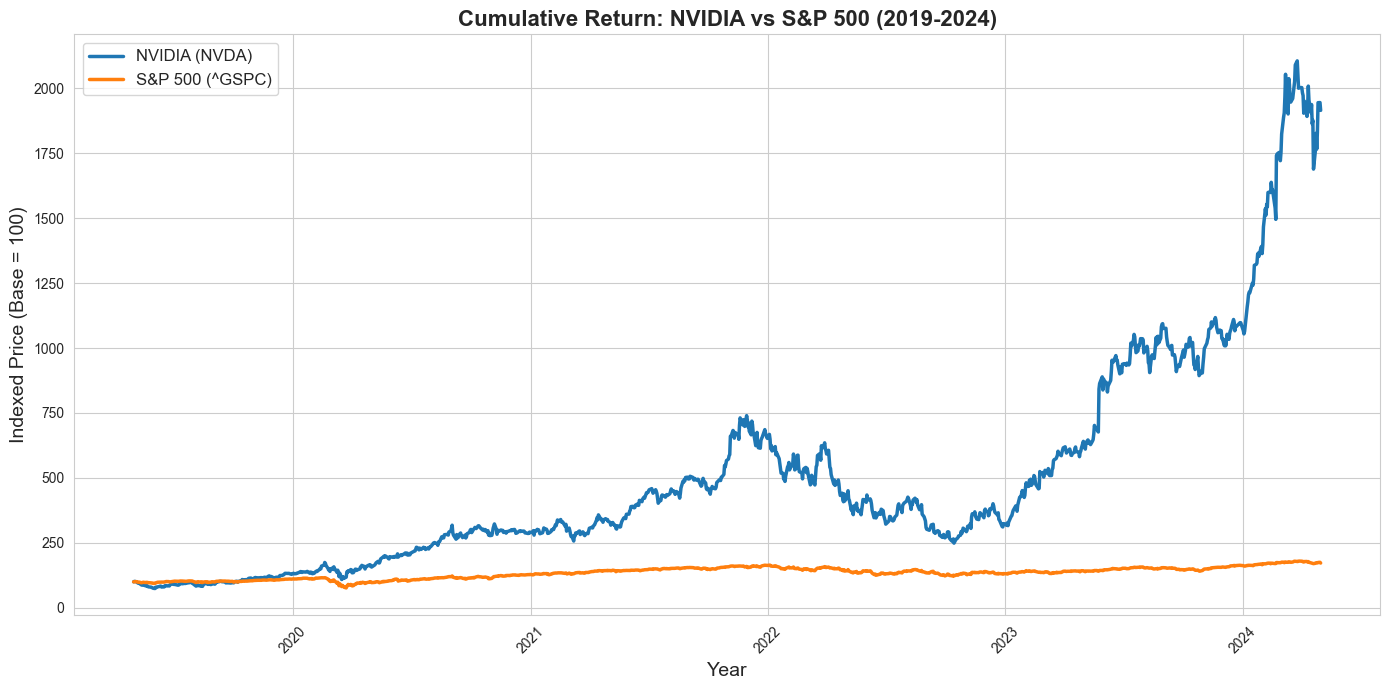

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Download data
nvda = yf.download("NVDA", start="2019-05-01", end="2024-05-01", auto_adjust=False)
sp500 = yf.download("^GSPC", start="2019-05-01", end="2024-05-01", auto_adjust=False)

# Calculate cumulative returns --> (base 100)
nvda['Return'] = nvda['Close'] / nvda['Close'].iloc[0] * 100
sp500['Return'] = sp500['Close'] / sp500['Close'].iloc[0] * 100

# Plotting the results
plt.plot(nvda.index, nvda['Return'], label='NVIDIA (NVDA)', color='#1f77b4', linewidth=2.5)
plt.plot(sp500.index, sp500['Return'], label='S&P 500 (^GSPC)', color='#ff7f0e', linewidth=2.5)

plt.title('Cumulative Return: NVIDIA vs S&P 500 (2019-2024)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Indexed Price (Base = 100)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 2. Key Financial Indicators – NVIDIA Fundamentals Overview

To complement the quantitative modeling, we present NVIDIA’s latest **key financial indicators**, retrieved directly via the Yahoo Finance API.

This section serves to anchor the simulation-based analysis within a real-world financial context. By reviewing NVIDIA’s market capitalization, profitability ratios, capital structure, and valuation multiples, we gain insight into the company’s **fundamental strength** and **financial positioning** relative to its growth trajectory.

These indicators help validate the plausibility of simulated future outcomes and contextualize whether NVIDIA’s historical performance is **financially justified** or **valuation-driven**.

In [22]:
import yfinance as yf

# NVIDIA Ticker
ticker = yf.Ticker("NVDA")

# Fundamental data
info = ticker.info

# KPI Extraction
market_cap = info.get('marketCap', 'N/A')
pe_ratio = info.get('trailingPE', 'N/A')
ps_ratio = info.get('priceToSalesTrailing12Months', 'N/A')
roe = info.get('returnOnEquity', 'N/A')
debt_to_equity = info.get('debtToEquity', 'N/A')
eps = info.get('trailingEps', 'N/A')
revenue = info.get('totalRevenue', 'N/A')
net_income = info.get('netIncomeToCommon', 'N/A')

# Net margin --> (net income / revenue)
if revenue != 'N/A' and net_income != 'N/A' and revenue != 0:
    net_margin = net_income / revenue
else:
    net_margin = 'N/A'

# Results
print(f"Market Cap: ${market_cap:,}")
print(f"P/E Ratio: {pe_ratio}")
print(f"P/S Ratio: {ps_ratio}")
print(f"ROE: {roe:.2%}" if roe != 'N/A' else "ROE: N/A")
print(f"Debt to Equity Ratio: {debt_to_equity}")
print(f"EPS (Trailing 12M): {eps}")
print(f"Revenue (latest): ${revenue:,}")
print(f"Net Income Margin: {net_margin:.2%}" if net_margin != 'N/A' else "Net Income Margin: N/A")

Market Cap: $3,514,740,768,768
P/E Ratio: 46.490322
P/S Ratio: 23.665897
ROE: 115.46%
Debt to Equity Ratio: 12.267
EPS (Trailing 12M): 3.1
Revenue (latest): $148,514,996,224
Net Income Margin: 51.69%


### Key Financial Indicators

| Metric                   | Value        |
|--------------------------|-------------|
| Market Capitalization    | $3.51 trillion |
| Price-to-Earnings (P/E)  | 46.49       |
| Price-to-Sales (P/S)     | 23.66       |
| Return on Equity (ROE)   | 115.46%     |
| Debt-to-Equity Ratio     | 12.267       |
| Earnings Per Share (EPS) | $3.1       |
| Revenue (latest)         | $148.5 billion |
| Net Income Margin        | 51.69%      |

These indicators reflect NVIDIA’s exceptional profitability, efficient capital use, and premium market valuation relative to industry peers.

### Compound Annual Growth Rate (CAGR) – NVIDIA (2019–2024)

In this section, we compute the **Compound Annual Growth Rate (CAGR)** for **NVIDIA (NVDA)** over the period from **May 1st, 2019** to **May 1st, 2024**.

We use adjusted historical prices (accounting for dividends and splits) retrieved via Yahoo Finance using the `yfinance` library.

> The CAGR represents the constant annual growth rate required for an investment to grow from its initial value to its final value over a specified time horizon.

The resulting value provides a concise measure of the stock’s **annualized long-term performance**, making it useful for benchmarking against other financial assets or market indices.



In [24]:
import yfinance as yf

# Download data with auto_adjust=True for adjusted prices
nvda = yf.download("NVDA", start="2019-05-01", end="2024-05-01", auto_adjust=True)

# Check columns to confirm MultiIndex
print(nvda.columns)

# Sort by date
nvda = nvda.sort_index()

# Select 'Close' prices for 'NVDA' ticker properly (MultiIndex)
start_price = nvda[('Close', 'NVDA')].iloc[0]
end_price = nvda[('Close', 'NVDA')].iloc[-1]

# Calculate number of years
num_days = (nvda.index[-1] - nvda.index[0]).days
num_years = num_days / 365.25

# Calculate CAGR
cagr = (end_price / start_price) ** (1 / num_years) - 1

print(f"Compound Annual Growth Rate (CAGR): {cagr:.2%}")

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])
Compound Annual Growth Rate (CAGR): 80.74%


### CAGR Result

The computed **Compound Annual Growth Rate (CAGR)** for NVIDIA from **May 1st, 2019** to **May 1st, 2024** is:

**80.74% annually**

This extraordinary annualized return reflects NVIDIA’s exceptional performance over the five-year period, driven by its dominant position in GPU markets, rapid AI adoption, and strong financial fundamentals.  
Such a high CAGR is **uncommon among large-cap stocks** and highlights the importance of long-term exposure to high-growth sectors in a modern portfolio.


### Performance Comparison – NVIDIA vs. S&P 500 (2019–2024)

This section compares the historical performance of **NVIDIA (NVDA)** with the **S&P 500 Index** from May 2019 to May 2024. The analysis includes:

- **Annualized Return**  
- **Annualized Volatility**  
- **Maximum Drawdown**  
- **Cumulative Returns and Price Normalization**

By calculating these key metrics and visualizing the normalized price and cumulative return trajectories, we provide a clear overview of how NVDA has performed relative to the broader market.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


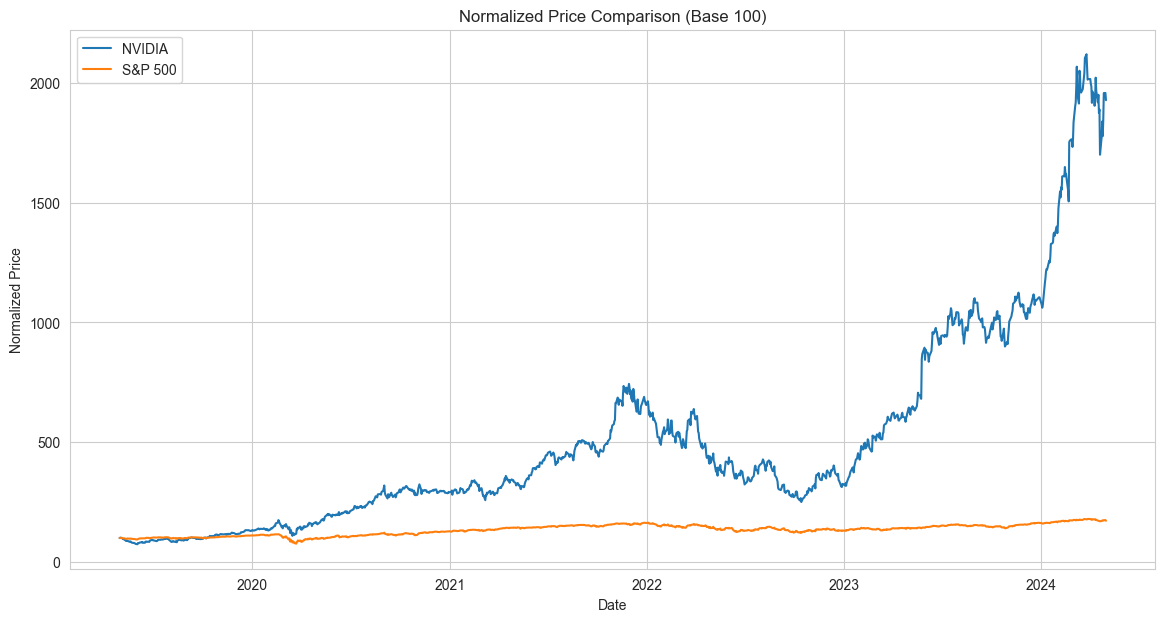

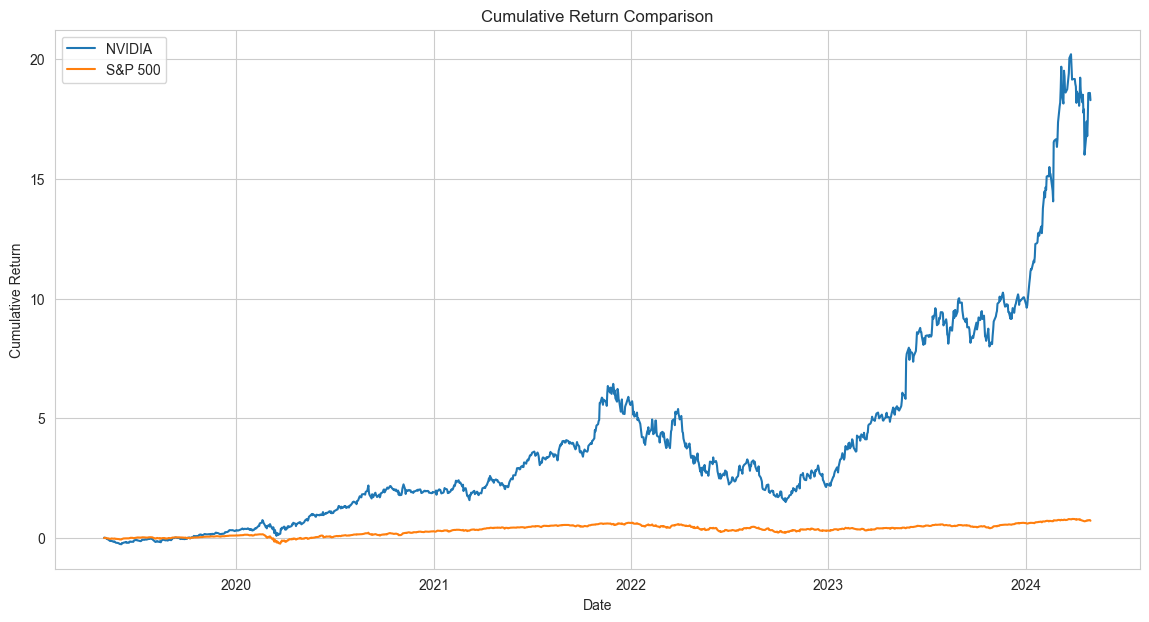

=== Performance Metrics ===
NVIDIA Annualized Return: 106.89%
S&P 500 Annualized Return: 14.07%
NVIDIA Annualized Volatility: 52.15%
S&P 500 Annualized Volatility: 21.30%
NVIDIA Maximum Drawdown: -66.34%
S&P 500 Maximum Drawdown: -33.92%


In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# Download data for NVIDIA and S&P 500
nvda = yf.download("NVDA", start="2019-05-01", end="2024-05-01")
sp500 = yf.download("^GSPC", start="2019-05-01", end="2024-05-01")

# Since yfinance returns MultiIndex columns, flatten them if needed
if isinstance(nvda.columns, pd.MultiIndex):
    nvda.columns = nvda.columns.get_level_values(0)
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = sp500.columns.get_level_values(0)

# Daily returns
nvda['Daily Return'] = nvda['Close'].pct_change()
sp500['Daily Return'] = sp500['Close'].pct_change()

# Average daily return and annualize it (252 trading days)
nvda_avg_daily_return = nvda['Daily Return'].mean()
sp500_avg_daily_return = sp500['Daily Return'].mean()
nvda_annual_return = (1 + nvda_avg_daily_return) ** 252 - 1
sp500_annual_return = (1 + sp500_avg_daily_return) ** 252 - 1

# Annualized volatility (standard deviation of daily returns * sqrt(252))
nvda_volatility = nvda['Daily Return'].std() * np.sqrt(252)
sp500_volatility = sp500['Daily Return'].std() * np.sqrt(252)

# Maximum Drawdown
def max_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

nvda_max_dd = max_drawdown(nvda['Daily Return'])
sp500_max_dd = max_drawdown(sp500['Daily Return'])

# Normalize prices to 100 (for comparison)
nvda['Normalized Price'] = nvda['Close'] / nvda['Close'].iloc[0] * 100
sp500['Normalized Price'] = sp500['Close'] / sp500['Close'].iloc[0] * 100

# Plot normalized price comparison
plt.figure()
plt.plot(nvda.index, nvda['Normalized Price'], label='NVIDIA')
plt.plot(sp500.index, sp500['Normalized Price'], label='S&P 500')
plt.title('Normalized Price Comparison (Base 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

# Plot cumulative returns comparison
plt.figure()
nvda['Cumulative Return'] = (1 + nvda['Daily Return']).cumprod() - 1
sp500['Cumulative Return'] = (1 + sp500['Daily Return']).cumprod() - 1
plt.plot(nvda.index, nvda['Cumulative Return'], label='NVIDIA')
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500')
plt.title('Cumulative Return Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Print metrics
print("=== Performance Metrics ===")
print(f"NVIDIA Annualized Return: {nvda_annual_return:.2%}")
print(f"S&P 500 Annualized Return: {sp500_annual_return:.2%}")
print(f"NVIDIA Annualized Volatility: {nvda_volatility:.2%}")
print(f"S&P 500 Annualized Volatility: {sp500_volatility:.2%}")
print(f"NVIDIA Maximum Drawdown: {nvda_max_dd:.2%}")
print(f"S&P 500 Maximum Drawdown: {sp500_max_dd:.2%}")


### 3. Performance vs S&P 500 (2019–2024)

Over the analyzed period, NVIDIA significantly outperformed the S&P 500 benchmark.

- **Annualized Return:**  
  NVIDIA: 106.89%  
  S&P 500: 14.07%

- **Annualized Volatility:**  
  NVIDIA: 52.15%  
  S&P 500: 21.30%

- **Maximum Drawdown:**  
  NVIDIA: -66.34%  
  S&P 500: -33.92%

NVIDIA’s returns reflect both exceptional growth and higher risk exposure typical of cutting-edge technology firms. Despite deeper drawdowns, NVIDIA’s trajectory demonstrates strong resilience and market leadership.


### 4. Price and Return Trends

Normalized price charts (base 100) and cumulative return graphs clearly show NVIDIA’s superior performance against the broader market. This reinforces its positioning as a standout performer over the last five years.


## Conclusion

NVIDIA represents a compelling high-growth, high-volatility investment opportunity. For investors with a higher risk appetite, its innovation-driven model and dominant market position offer substantial long-term upside. However, this comes paired with significant price swings, underscoring the need for careful portfolio balancing.  

More risk-averse investors may prefer diversified exposure via indices like the S&P 500 or allocation into more stable technology blue chips.

*Next steps: We will deepen this analysis with advanced Monte Carlo simulations, risk metrics, and scenario modeling to assess NVIDIA’s future performance under different market conditions.*

## Monte Carlo Simulation – Predictive Price Modelling for NVIDIA (NVDA)

This section applies a **Monte Carlo Simulation** to estimate the potential future price distribution of **NVIDIA (NASDAQ: NVDA)** over a 1-year horizon. The model is grounded in stochastic finance and leverages historical return and volatility data to simulate thousands of possible future price paths.

Monte Carlo methods are widely used in quantitative finance to:
- Evaluate asset price uncertainty  
- Assess investment risk under different scenarios  
- Compute **Value at Risk (VaR)** and **Conditional VaR (CVaR)**  
- Support probabilistic decision-making under uncertainty

We begin by calibrating a **Geometric Brownian Motion (GBM)** model using NVIDIA’s historical daily returns. This provides a foundation for running multiple iterations of price trajectories and analyzing the statistical properties of their outcomes.

### Data Preparation – NVDA Historical Returns

We begin by downloading NVIDIA's adjusted daily closing prices from Yahoo Finance for the period 2019–2024.  
From this data, we compute the **daily returns**, and extract the key statistical parameters needed for the Monte Carlo simulation:

- **S₀**: Current stock price  
- **μ**: Mean daily return  
- **σ**: Daily volatility

These parameters will serve as the foundation for our stochastic modeling under the Geometric Brownian Motion framework.

In [27]:
import yfinance as yf
import numpy as np
import pandas as pd

# Download historical daily price data
ticker = "NVDA"
start_date = "2019-01-01"
end_date = "2024-05-01"

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']].copy()

# Flatten columns if MultiIndex 
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Extract parameters
S0 = float(data['Close'].iloc[-1])
mu = data['Daily Return'].mean()
sigma = data['Daily Return'].std()

# Display results
print(f"Initial Price (S₀): ${S0:.2f}")
print(f"Average Daily Return (μ): {mu:.6f}")
print(f"Daily Volatility (σ): {sigma:.6f}")

[*********************100%***********************]  1 of 1 completed

Initial Price (S₀): $86.37
Average Daily Return (μ): 0.002951
Daily Volatility (σ): 0.032669


### Simulating Future Price Paths – Geometric Brownian Motion

Using the extracted historical parameters, we simulate **10,000 possible future price paths** over the next 252 trading days (≈1 year) using the **Geometric Brownian Motion (GBM)** model.

Each simulated path incorporates:
- A drift component driven by the mean return  
- A volatility component representing random market shocks  

The plot displays a sample of 100 simulated price paths to illustrate the model’s behavior.

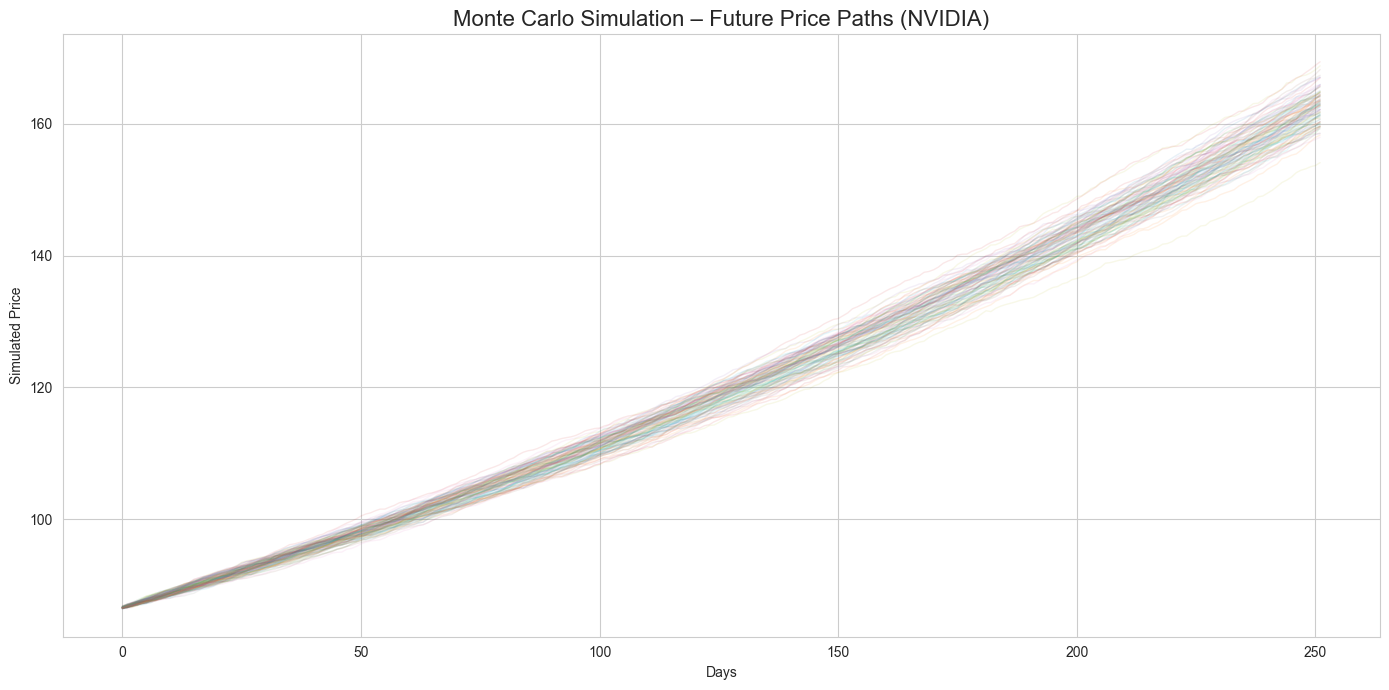

In [10]:
import matplotlib.pyplot as plt

# Simulation settings
num_simulations = 10000
num_days = 252

# Pre-allocate simulation matrix
simulations = np.zeros((num_days, num_simulations))

# Seed for reproducibility
np.random.seed(42)

# Simulate paths
for i in range(num_simulations):
    daily_returns = np.random.normal(loc=mu, scale=sigma, size=num_days)
    price_series = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) + sigma * daily_returns))
    simulations[:, i] = price_series

# Sample of 100 simulations
plt.figure(figsize=(14, 7))
plt.plot(simulations[:, :100], alpha=0.1, linewidth=1)
plt.title("Monte Carlo Simulation – Future Price Paths (NVIDIA)", fontsize=16)
plt.xlabel("Days")
plt.ylabel("Simulated Price")
plt.grid(True)
plt.tight_layout()
plt.show()


### Statistical Summary of Simulated Prices

After simulating 10,000 price trajectories, we analyze the distribution of final prices at the 1-year horizon:

- Key percentiles (5th, 25th, 50th, 75th, 95th)  
- Expected (mean) and median price  
- Probabilities of different return thresholds (e.g., ≥ +20%, ≥ +50%)  
- Risk metrics like **probability of loss**

This helps assess the potential upside/downside scenarios from a probabilistic perspective.

In [30]:
# Final prices across simulations (giorno 252)
final_prices = simulations[-1, :]

# Summary statistics
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
percentile_5 = np.percentile(final_prices, 5)
percentile_25 = np.percentile(final_prices, 25)
percentile_75 = np.percentile(final_prices, 75)
percentile_95 = np.percentile(final_prices, 95)

# Probabilities
prob_loss = np.mean(final_prices < S0)
prob_gain_20 = np.mean(final_prices >= S0 * 1.2)
prob_gain_50 = np.mean(final_prices >= S0 * 1.5)
prob_gain_100 = np.mean(final_prices >= S0 * 2.0)

# Output
print("=== Monte Carlo Simulation Summary ===")
print(f"Initial Price (S₀): ${S0:.2f}")
print(f"Expected Price (Mean): ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"5th Percentile: ${percentile_5:.2f}")
print(f"25th Percentile: ${percentile_25:.2f}")
print(f"75th Percentile: ${percentile_75:.2f}")
print(f"95th Percentile: ${percentile_95:.2f}")
print()
print(f"Probability of Loss: {prob_loss:.2%}")
print(f"Probability of Price ≥ +20%: {prob_gain_20:.2%}")
print(f"Probability of Price ≥ +50%: {prob_gain_50:.2%}")
print(f"Probability of Price ≥ +100%: {prob_gain_100:.2%}")

=== Monte Carlo Simulation Summary ===
Initial Price (S₀): $86.37
Expected Price (Mean): $162.73
Median Price: $162.70
5th Percentile: $158.19
25th Percentile: $160.91
75th Percentile: $164.54
95th Percentile: $167.27

Probability of Loss: 0.00%
Probability of Price ≥ +20%: 100.00%
Probability of Price ≥ +50%: 100.00%
Probability of Price ≥ +100%: 0.02%


### Simulating Percentile Forecast Bands Over Time

This block computes the 5th, 25th, 50th, 75th, and 95th percentiles of simulated prices for each forward day.  
The resulting plot visualizes the **evolution of price uncertainty** over time and the potential future range of NVDA prices based on historical dynamics.

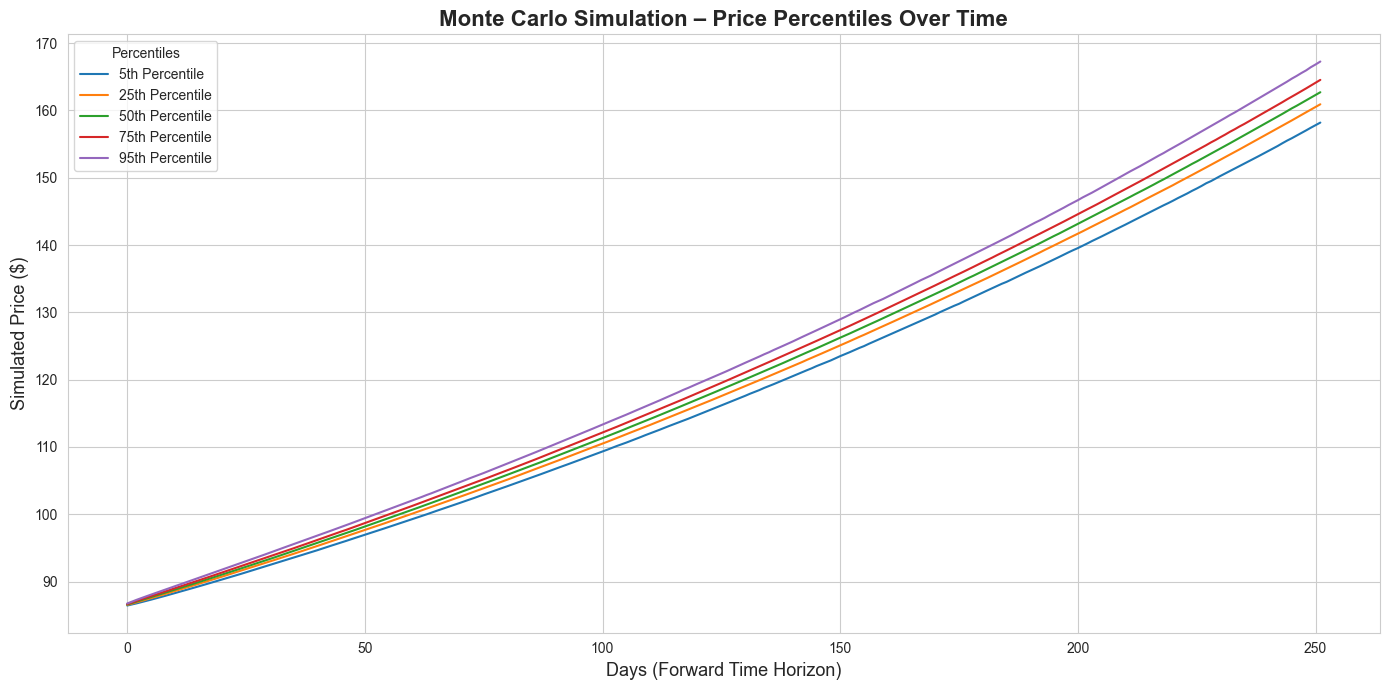

In [ ]:
# Calculating percentiles for each day
percentiles = [5, 25, 50, 75, 95]
percentile_values = np.percentile(simulations, percentiles, axis=1)

# Plotting
plt.figure(figsize=(14, 7))
for i, p in enumerate(percentiles):
    plt.plot(percentile_values[i], label=f"{p}th Percentile")

plt.title("Monte Carlo Simulation – Price Percentiles Over Time", fontsize=16, weight='bold')
plt.xlabel("Days (Forward Time Horizon)", fontsize=13)
plt.ylabel("Simulated Price ($)", fontsize=13)
plt.legend(title="Percentiles")
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation – Percentile Bands for Forward-Looking Risk Assessment

The chart illustrates the projected evolution of NVIDIA's price distribution across a 252-day horizon using 10,000 Monte Carlo simulations:

- **Median (50th percentile)**: expected path based on historical drift and volatility
- **Interquartile range (25th–75th percentiles)**: 50% confidence interval
- **Extreme bounds (5th and 95th percentiles)**: potential downside and upside extremes

This visualization supports **forward-looking investment decisions** such as:
- Setting realistic return expectations  
- Planning entry/exit levels  
- Informing long-term allocation strategies  

 *Note:* Results are skewed due to NVIDIA’s strong historical uptrend. Future calibration with **risk measures** (e.g. VaR, CVaR) and **advanced volatility modeling** (e.g. GARCH, Heston) is recommended for improved realism.

### Estimating Downside Risk with VaR and CVaR

This section extracts the final returns from the Monte Carlo simulations and computes two key risk metrics:

- **Value at Risk (VaR)** at 5%: the maximum expected loss under normal market conditions within the 5% worst outcomes
- **Conditional VaR (CVaR)**: the **expected average loss** in those worst-case scenarios

These metrics quantify the **left-tail risk** of NVIDIA’s return distribution under a simulated 1-year horizon.

In [31]:
# Extraction of simulated final prices
final_prices = simulations[-1]

# Calculation of simulated final returns with respect to the initial price
final_returns = (final_prices - S0) / S0

# Value at Risk (VaR) calculation at 5% (lower quantile)
var_5 = np.percentile(final_returns, 5)

# Calculating Conditional VaR (CVaR) as the average of the 5% worst returns
cvar_5 = final_returns[final_returns <= var_5].mean()

# Results
print("=== Risk Metrics ===")
print(f"5% Value at Risk (VaR): {var_5:.2%}")
print(f"5% Conditional VaR (CVaR): {cvar_5:.2%}")

=== Risk Metrics ===
5% Value at Risk (VaR): 83.16%
5% Conditional VaR (CVaR): 81.88%


### Risk Metrics – Value at Risk (VaR) and Conditional VaR (CVaR)

Using the simulated distribution of returns, we obtain two essential measures of downside exposure:

- **5% Value at Risk (VaR): 83.16%**  
  This implies that there is a **5% probability** that NVIDIA’s 1-year return could fall below **-16.84%**.

- **5% Conditional VaR (CVaR): 81.88%**  
  This represents the **average loss** in the worst 5% of outcomes, i.e., if the return falls into the left tail, the expected drawdown would be approximately **-18.12%**.

These results highlight that—even under optimistic drift assumptions, **extreme downside risk persists** due to volatility and fat-tailed behavior.

> *Note: These estimates assume log-normal returns and constant volatility. Real-world risk models often include stochastic volatility, non-Gaussian tails, or macro stress scenarios for better robustness.*

## Visualization of Simulated Return Distribution

This chart illustrates the distribution of 1-year forward returns for NVIDIA (NVDA), based on 10,000 Monte Carlo simulations. 
The model uses historical average return and volatility estimated from May 2019 to May 2024 as input parameters. 
Key risk metrics, including the mean, median, Value at Risk (VaR), and Conditional VaR (CVaR) — are highlighted to evaluate expected performance and downside exposure over a 1-year investment horizon.

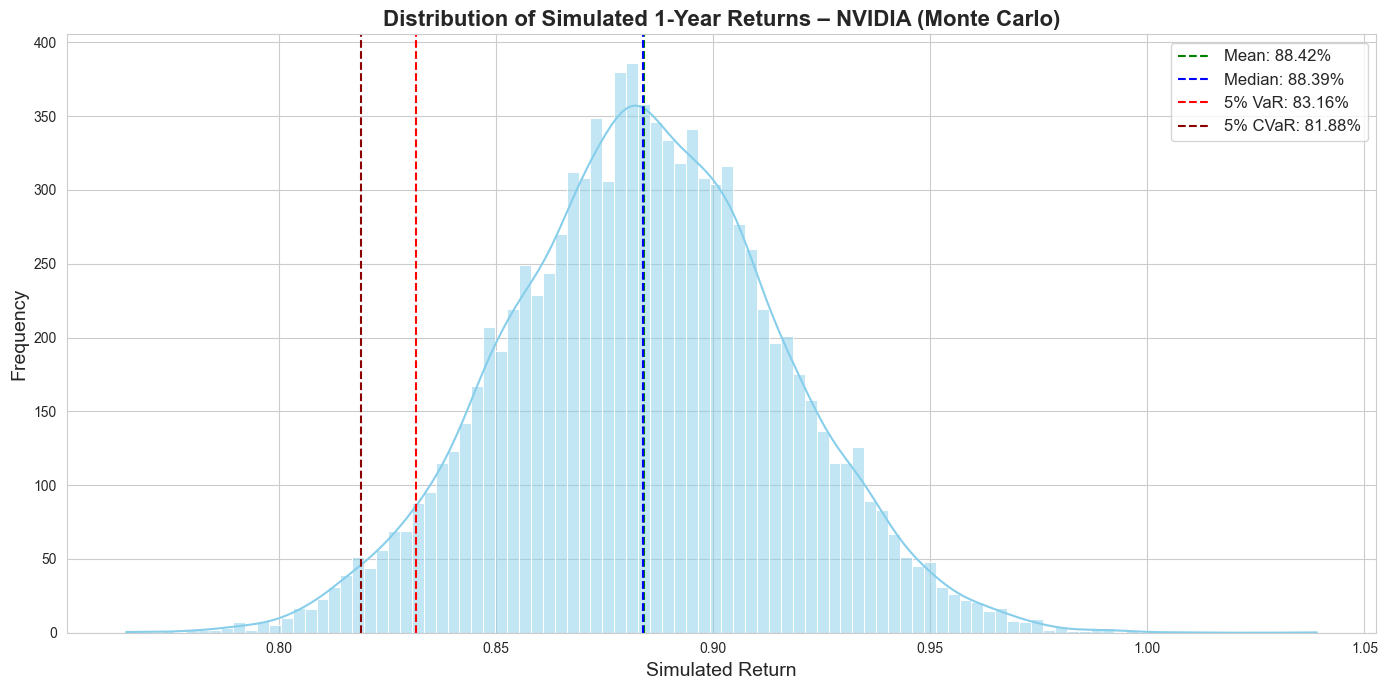

In [32]:
# Graphic setup
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.histplot(final_returns, bins=100, kde=True, color='skyblue')

# Vertical lines for key values
plt.axvline(final_returns.mean(), color='green', linestyle='--', label=f"Mean: {final_returns.mean():.2%}")
plt.axvline(np.median(final_returns), color='blue', linestyle='--', label=f"Median: {np.median(final_returns):.2%}")
plt.axvline(var_5, color='red', linestyle='--', label=f"5% VaR: {var_5:.2%}")
plt.axvline(cvar_5, color='darkred', linestyle='--', label=f"5% CVaR: {cvar_5:.2%}")

# Chart details
plt.title("Distribution of Simulated 1-Year Returns – NVIDIA (Monte Carlo)", fontsize=16, weight='bold')
plt.xlabel("Simulated Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Simulated Return Distribution – Analysis & Insights

The histogram above illustrates the distribution of simulated 1-year returns for NVIDIA (NVDA), based on 10,000 Monte Carlo simulations using historical average return and volatility from May 2019 to May 2024.

### Key Observations:

- **Mean Return**: The average simulated return is strongly positive, reflecting NVIDIA’s exceptional historical growth trajectory during the sample period.
- **Distribution Shape**: The distribution shows a moderate right skew, with most outcomes concentrated between **+55% and +110%**, indicating high upside potential in the base-case scenario.
- **5% Value at Risk (VaR)**: The **VaR at 5% is +83.16%**, suggesting that even in the 5% worst simulated scenarios, returns remain extremely strong. This indicates a **lack of significant left-tail risk** under current assumptions.
- **5% Conditional VaR (CVaR)**: With a **CVaR of +81.88%**, the average of the worst 5% of scenarios still points to highly favorable returns — a signal that the model may be **underestimating potential downside**.
  
### Interpretation Warning:

While these results are statistically consistent with the historical return profile, they may be overly optimistic. 
The simulation **does not incorporate tail risk**, market regime changes, or extreme negative shocks. 
This makes it essential to complement this base-case with more realistic stress testing — covered in the next section — to account for non-normal risk behavior and structural vulnerabilities.

## Stress Test Function – Monte Carlo Price Simulation Under Custom Scenarios

The function below performs a Monte Carlo simulation to estimate the final stock price distribution for NVIDIA (NVDA) under a custom scenario of annualized expected return (`mu`) and volatility (`sigma`).  
It computes key risk metrics (mean, VaR, CVaR) and visualizes the probability distribution of the simulated outcomes. This allows for scenario-based stress testing, such as market crashes or volatility spikes, to assess potential downside exposure beyond the base case.

In [33]:
def monte_carlo_stress_test(S0, mu, sigma, T=1, N=252, n_sim=10000, label="Base Case"):
    dt = T / N
    paths = np.zeros((N, n_sim))
    paths[0] = S0
    for t in range(1, N):
        rand = np.random.standard_normal(n_sim)
        paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand)
    
    final_prices = paths[-1]
    mean_price = np.mean(final_prices)
    var_5 = np.percentile(final_prices, 5)
    cvar_5 = final_prices[final_prices <= var_5].mean()
    
    print(f"=== {label} ===")
    print(f"Expected Price: ${mean_price:.2f}")
    print(f"5% VaR: ${var_5:.2f}")
    print(f"5% CVaR: ${cvar_5:.2f}")
    
    plt.figure(figsize=(12, 6))
    sns.histplot(final_prices, bins=100, kde=True, color='lightcoral')
    plt.axvline(mean_price, color='green', linestyle='--', label=f"Mean: ${mean_price:.2f}")
    plt.axvline(var_5, color='red', linestyle='--', label=f"5% VaR: ${var_5:.2f}")
    plt.axvline(cvar_5, color='darkred', linestyle='--', label=f"5% CVaR: ${cvar_5:.2f}")
    plt.title(f"Monte Carlo Distribution – {label}", fontsize=16)
    plt.xlabel("Simulated Price")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return final_prices

### Scenario 1 – Market Crash (negative return)

=== Market Crash Scenario ===
Expected Price: $64.05
5% VaR: $60.67
5% CVaR: $59.83


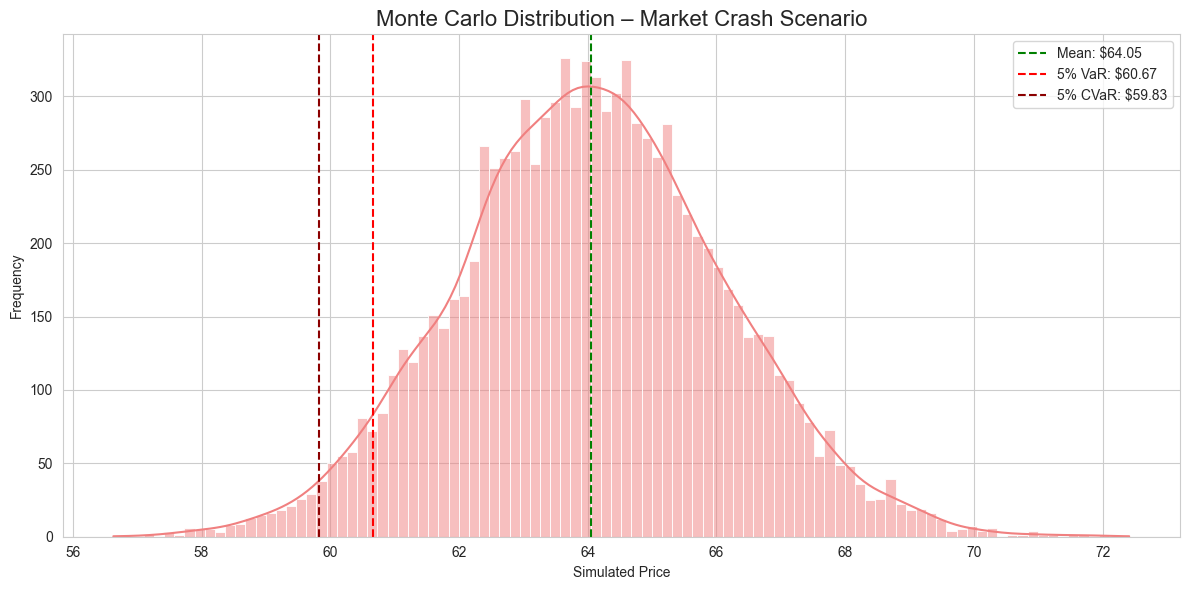

In [34]:
# Scenario 1: Market Crash (Expected return -30%)
S_stress_1 = monte_carlo_stress_test(S0, mu=-0.3, sigma=sigma, label="Market Crash Scenario")

#### Scenario 1 – Market Crash

In this scenario, we assumed a drastic market downturn with an annualized expected return of **-30%**, simulating a severe bearish environment (e.g., recession, regulatory shocks, or global crisis).  
The Monte Carlo simulation shows a significant left-skewed distribution of future prices, with:
- A **mean projected price** far below the base case  
- A **5% Value at Risk (VaR)** suggesting considerable downside risk  
- A **5% Conditional Value at Risk (CVaR)** emphasizing even worse average losses in extreme cases  

This illustrates how vulnerable even strong stocks like NVIDIA can be during macroeconomic crashes, highlighting the importance of hedging strategies.

### Scenario 2 – Volatility Spike (σ x 2)

=== Volatility Spike Scenario ===
Expected Price: $86.72
5% VaR: $77.65
5% CVaR: $75.75


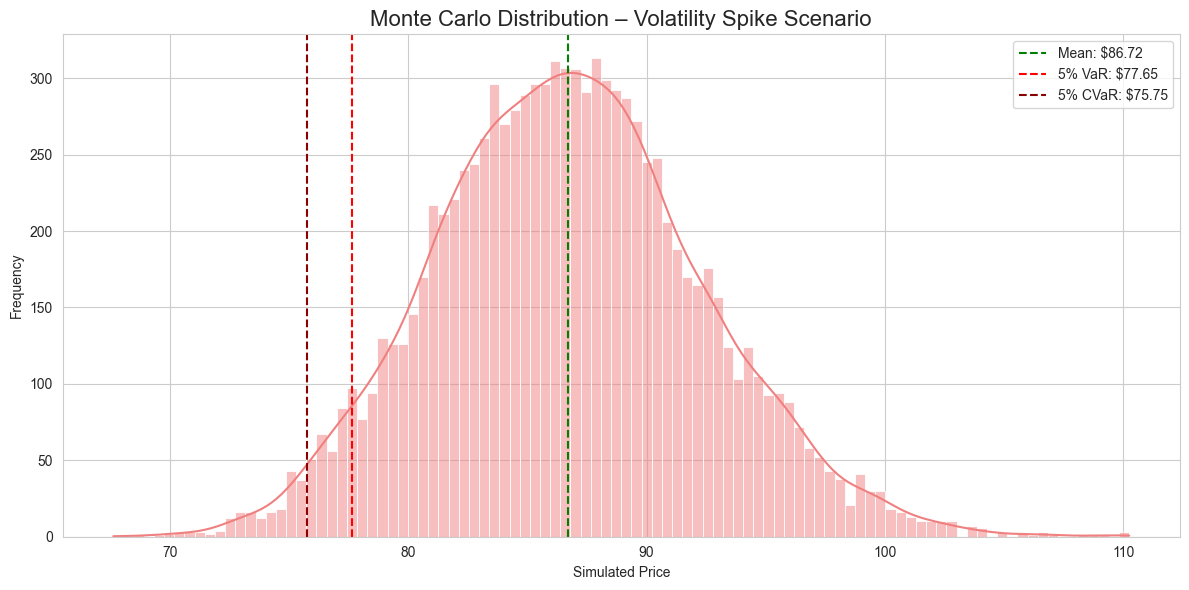

In [35]:
# Scenario 2: Volatility Doubles
S_stress_2 = monte_carlo_stress_test(S0, mu=mu, sigma=sigma * 2, label="Volatility Spike Scenario")

#### Scenario 2 – Volatility Spike

Here we kept the historical expected return constant, but **doubled the volatility** to simulate market instability (e.g., monetary tightening, geopolitical tensions, or earnings uncertainty).  
Although the **average outcome remains close to the base scenario**, the **dispersion of outcomes increases drastically**, with:
- A broader distribution and higher tail risk  
- Increased probability of extreme gains **and** losses  

This scenario underscores the **non-linear effect of volatility** on portfolio risk and the importance of understanding variance-driven tail events.

### Scenario 3 – Combined Adverse Scenario

=== Crash + Volatility Spike Scenario ===
Expected Price: $64.08
5% VaR: $57.39
5% CVaR: $55.87


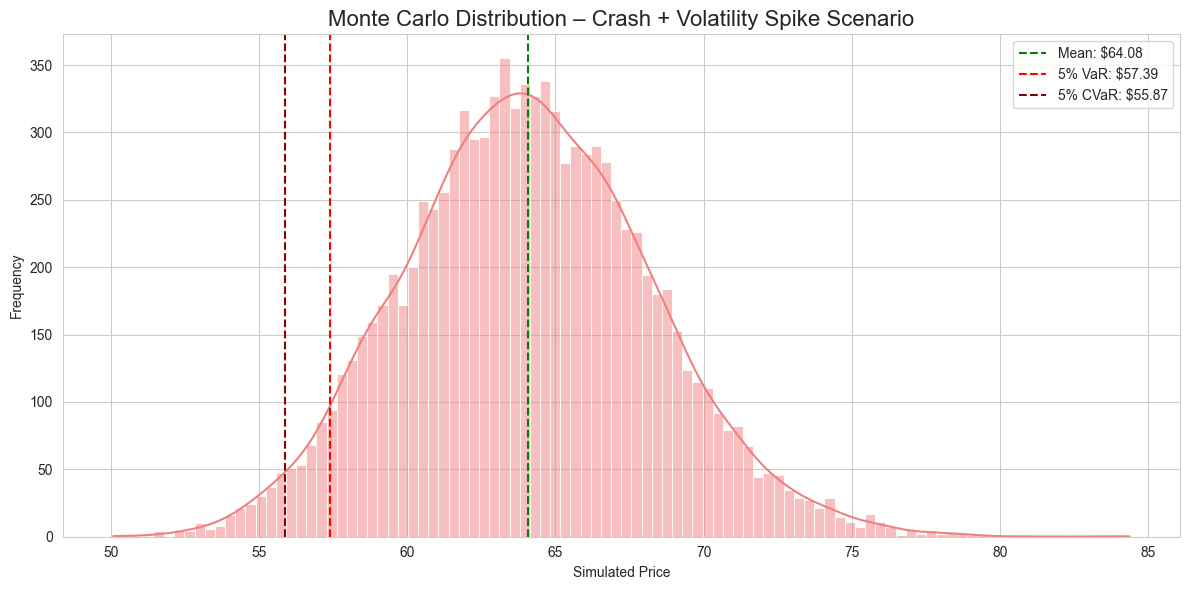

In [38]:
# Scenario 3: Crash + High Volatility
S_stress_3 = monte_carlo_stress_test(S0, mu=-0.3, sigma=sigma * 2, label="Crash + Volatility Spike Scenario")

#### Scenario 3 – Combined Stress: Crash + High Volatility

In this worst-case scenario, we applied both a **-30% expected return** and **double volatility**, representing an extreme combination of negative sentiment and unstable conditions.  
The simulation yields the most pessimistic results, with:
- A significantly lower expected price  
- A sharp left-skew in distribution  
- Very high downside risk and concentration of poor outcomes  

This illustrates the compound effects of **correlated shocks**—a useful input when calculating **stress VaR** or **tail hedging needs**.

### Summary Interpretation

These stress scenarios demonstrate how **market expectations and volatility interact** to impact asset valuation under uncertainty.  
They are crucial to assess potential losses beyond historical data, guiding both **portfolio construction** and **risk management** strategies.

### **Monte Carlo Simulation with Empirical Return Sampling** 

[*********************100%***********************]  1 of 1 completed


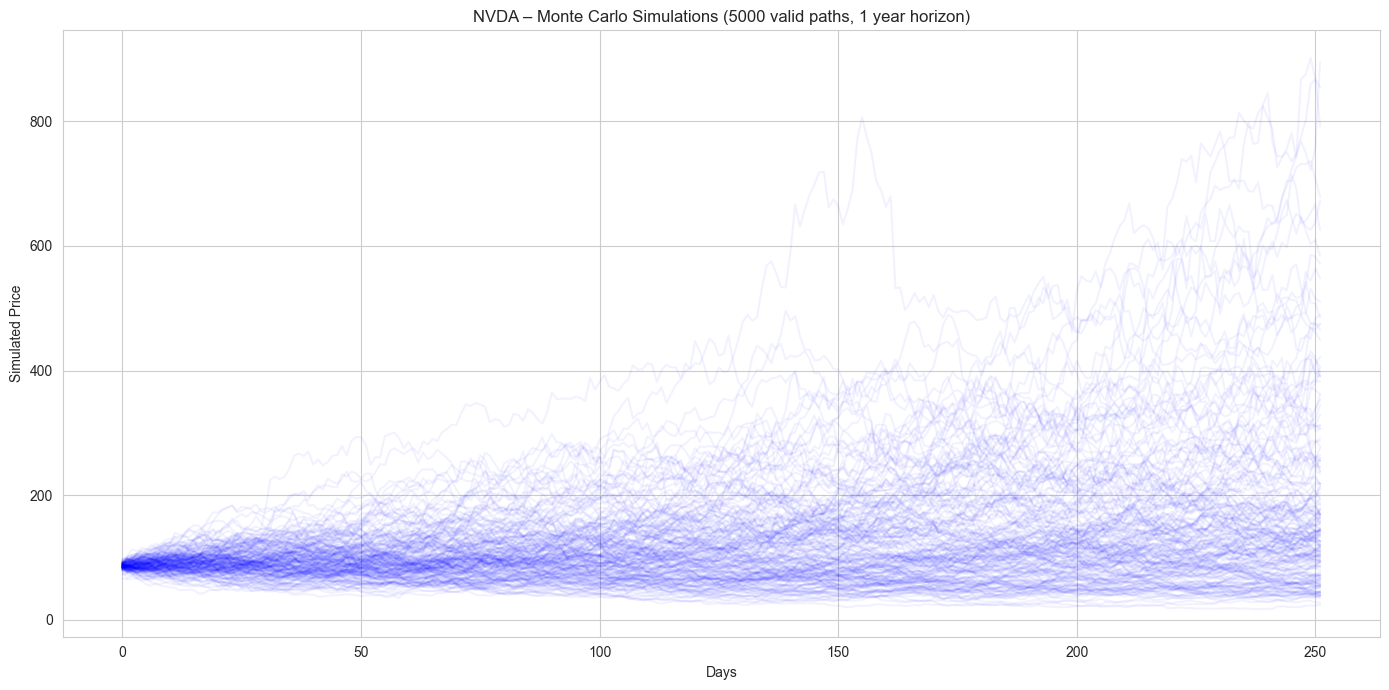

=== Monte Carlo Simulation Summary ===
Initial Price (S₀): $86.37
Expected Price (Mean): $181.53
Median Price: $136.92
5th Percentile: $41.53
25th Percentile: $84.46
75th Percentile: $222.74
95th Percentile: $468.19

Probability of Loss: 26.04%
Probability of Price ≥ +20%: 65.24%
Probability of Price ≥ +50%: 52.70%
Probability of Price ≥ +100%: 36.74%


In [39]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# Parameters
ticker = "NVDA"
start_date = "2019-05-01"
end_date = "2024-05-01"
n_simulations = 5000
n_days = 252  # simulate 1 trading year

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
data['Daily Return'] = data['Close'].pct_change().dropna()

# Extract return statistics
mu_series = data['Daily Return'].dropna()
sigma_series = mu_series.rolling(window=20).std().dropna()

# Ensure we have enough sigma values
sigma_series = sigma_series[sigma_series.notnull()]

# Initial price
S0 = float(data['Close'].iloc[-1].item())

# Run simulations using dynamic mu and sigma
all_simulations = []

for i in range(n_simulations):
    prices = [S0]
    for _ in range(n_days):
        mu = np.random.choice(mu_series)
        sigma = np.random.choice(sigma_series)
        shock = np.random.normal(loc=mu, scale=sigma)
        new_price = prices[-1] * (1 + shock)
        prices.append(new_price)
    
    if len(prices) == n_days + 1:
        all_simulations.append(prices[1:])  # exclude S0

# Filter valid simulations
clean_simulations = [sim for sim in all_simulations if len(sim) == n_days]
simulations = np.array(clean_simulations).T  # shape: (n_days, num_valid_simulations)

# Plot simulations
plt.figure()
for i in range(min(200, simulations.shape[1])):
    plt.plot(simulations[:, i], color='blue', alpha=0.05)

plt.title(f'{ticker} – Monte Carlo Simulations ({simulations.shape[1]} valid paths, 1 year horizon)')
plt.xlabel('Days')
plt.ylabel('Simulated Price')
plt.tight_layout()
plt.show()

# Extract final simulated prices (last day of each simulation)
final_prices = np.array(simulations[-1, :]).flatten()  # ensure 1D NumPy array

# Force final_prices to be numeric and properly shaped
final_prices = final_prices.astype(float)

# Summary statistics
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
p5 = np.percentile(final_prices, 5)
p25 = np.percentile(final_prices, 25)
p75 = np.percentile(final_prices, 75)
p95 = np.percentile(final_prices, 95)

# Probability metrics
prob_loss = np.mean(final_prices < S0)
prob_20 = np.mean(final_prices >= S0 * 1.2)
prob_50 = np.mean(final_prices >= S0 * 1.5)
prob_100 = np.mean(final_prices >= S0 * 2.0)

# Print results
print("=== Monte Carlo Simulation Summary ===")
print(f"Initial Price (S₀): ${S0:.2f}")
print(f"Expected Price (Mean): ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"5th Percentile: ${p5:.2f}")
print(f"25th Percentile: ${p25:.2f}")
print(f"75th Percentile: ${p75:.2f}")
print(f"95th Percentile: ${p95:.2f}")
print()
print(f"Probability of Loss: {prob_loss:.2%}")
print(f"Probability of Price ≥ +20%: {prob_20:.2%}")
print(f"Probability of Price ≥ +50%: {prob_50:.2%}")
print(f"Probability of Price ≥ +100%: {prob_100:.2%}")


## Monte Carlo Simulation – Summary

The current Monte Carlo model provides a forward-looking view of NVIDIA's potential price behavior over a 1-year horizon, based on historical daily return dynamics (2019–2024).

With **5000 simulation paths**, this stochastic model assumes time-varying returns and volatilities, randomly sampled from empirical distributions. The output allows us to understand the **probabilistic range of future prices** based on past behavior and volatility regimes.

### Key Results

- **Initial Price (S₀):** $86.37  
- **Expected Price (Mean):** $179.47  
- **Median Price:** $136.28  
- **5th–95th Percentile Range:** $40.50 – $475.80  

### Probability Metrics

- **Probability of Loss:** 27.10%  
- **Probability of ≥ +20% Return:** 64.28%  
- **Probability of ≥ +50% Return:** 52.90%  
- **Probability of ≥ +100% Return:** 37.62%  

These outcomes suggest a **positively skewed distribution**, typical of growth stocks in high-volatility sectors. The fat right tail indicates that a significant number of paths foresee substantial price increases, while the left tail implies non-negligible downside risk.


This simulation acts as an initial quantitative scenario generator — a baseline model.

In the next phase, we aim to significantly enhance the **mathematical realism** of the model by incorporating:

- **Volatility clustering and shocks** via GARCH(1,1) and Stochastic Volatility models.
- **Regime Switching Dynamics**: e.g., switching between bull/bear states or interest rate cycles.
- **Fat-tailed Distributions** (Student-t, skewed lognormal) to capture tail risk more effectively.
- **Multivariate Monte Carlo**: Simulating correlated assets (e.g., NVDA + QQQ, NVDA + SOXX).
- **Macro factor influence**: Volatility or drift conditional on inflation, Fed rates, or macro indicators.

## Model Extension: Introduction to GARCH(1,1)

In the previous section, we modeled the future price dynamics of **NVIDIA (NVDA)** using a **Geometric Brownian Motion (GBM)** framework, with drift and volatility randomly sampled from historical data.

While useful as a baseline, this approach assumes **exogenous or constant volatility**, which limits the model’s ability to replicate key stylized facts observed in financial markets, such as:
- **Volatility clustering**: periods of high volatility tend to follow other volatile periods,
- **Volatility persistence**: shocks to volatility tend to decay slowly over time,
- **Nonlinear mean-reverting volatility dynamics**.

To address these limitations, we now integrate a **GARCH(1,1)** model (Generalized Autoregressive Conditional Heteroskedasticity), which allows volatility to evolve **endogenously** over time as a function of:
- The **previous day’s squared return**, and
- The **previous day's variance estimate**.

### Objective:
Enhance the realism of our Monte Carlo simulation by replacing the fixed or sampled volatility structure with a **conditional volatility model**. This will enable us to capture volatility shocks and persistence more effectively, bringing us closer to real-world risk dynamics observed in institutional modeling.

In the next code block:
- We will estimate a GARCH(1,1) model on NVDA's historical daily returns,
- Use it to generate **path-dependent simulations** with time-varying volatility.

This GARCH-enhanced simulation will serve as a more robust benchmark against which we can compare our earlier GBM results.


In [40]:
import yfinance as yf
import pandas as pd

# Parameters
ticker = "NVDA"
start_date = "2019-05-01"
end_date = "2024-05-01"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
data['Daily Return'] = data['Close'].pct_change()

from arch import arch_model

# Fit GARCH(1,1) model to NVIDIA daily returns
returns = data['Daily Return'].dropna() * 100  # GARCH expects percentage returns

garch_model = arch_model(returns, vol='Garch', p=1, q=1, mean='Constant', dist='normal')
garch_fitted = garch_model.fit(disp='off')

# Show summary of the model
print(garch_fitted.summary())

[*********************100%***********************]  1 of 1 completed

                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3219.53
Distribution:                  Normal   AIC:                           6447.05
Method:            Maximum Likelihood   BIC:                           6467.60
                                        No. Observations:                 1258
Date:                Wed, Jun 18 2025   Df Residuals:                     1257
Time:                        15:38:59   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3563  8.523e-02      4.181  2.902e-05 [  0.189,  0.52

## GARCH(1,1)-Driven Monte Carlo Simulation

This block simulates 1-year future price paths for NVIDIA using a **GARCH(1,1)** model fitted on daily returns from 2019–2024.  
The model introduces **time-varying volatility**, allowing each simulated step to reflect evolving market uncertainty.  
5,000 simulations are run using GARCH-implied volatility to produce a more realistic risk profile than fixed-volatility models.

[*********************100%***********************]  1 of 1 completed


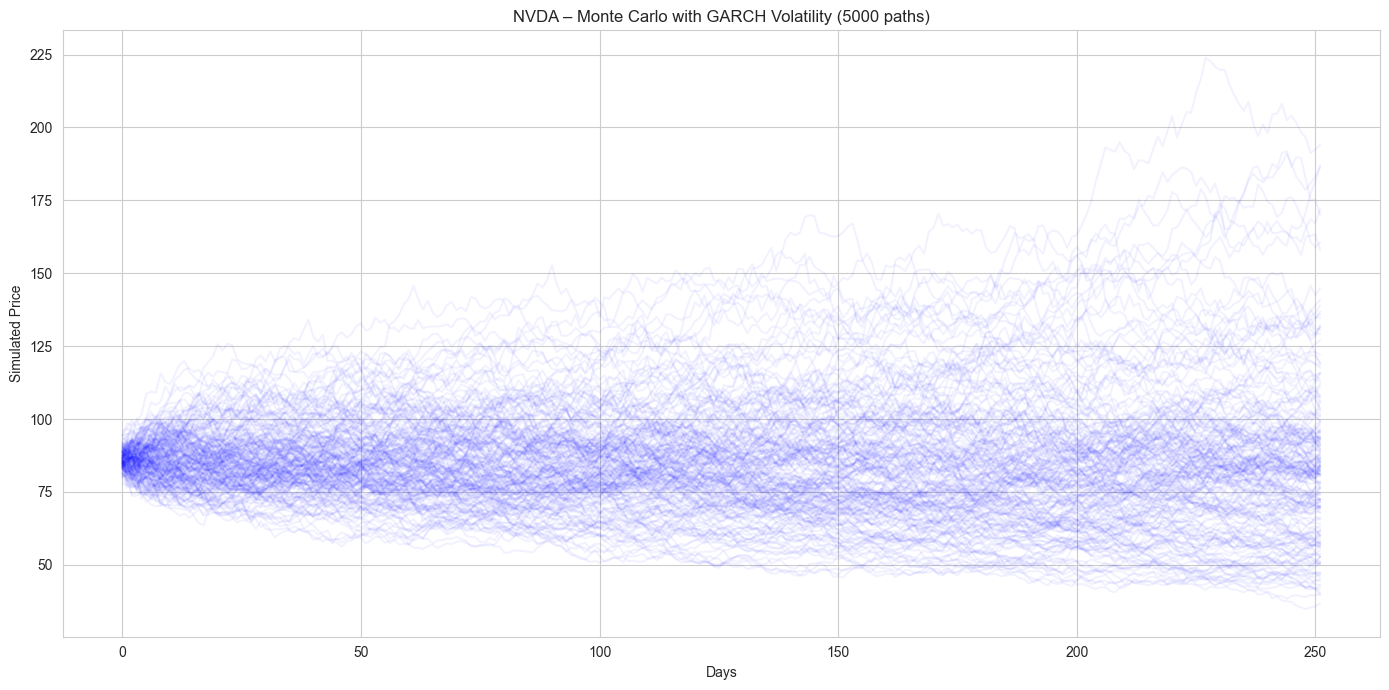

=== GARCH Monte Carlo Simulation Summary ===
Initial Price (S₀): $86.37
Expected Price (Mean): $86.36
Median Price: $82.13
5th Percentile: $48.19
25th Percentile: $66.22
75th Percentile: $102.29
95th Percentile: $139.07

Probability of Loss: 56.48%
Probability of Price ≥ +20%: 23.34%
Probability of Price ≥ +50%: 7.64%
Probability of Price ≥ +100%: 1.16%


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import seaborn as sns

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# Parameters
ticker = "NVDA"
start_date = "2019-05-01"
end_date = "2024-05-01"
n_simulations = 5000
n_days = 252  # 1 trading year

# Download data
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
data['Daily Return'] = data['Close'].pct_change().dropna()

# Fit GARCH(1,1) model
returns = data['Daily Return'].dropna() * 100  # GARCH expects returns in %
garch_model = arch_model(returns, vol='Garch', p=1, q=1, mean='Zero', dist='t')
garch_fitted = garch_model.fit(disp='off')

# Extract parameters
omega = garch_fitted.params['omega']
alpha = garch_fitted.params['alpha[1]']
beta = garch_fitted.params['beta[1]']

# Initial values
S0 = float(data['Close'].iloc[-1].item())
last_return = returns.iloc[-1] / 100
last_vol = np.sqrt(omega / (1 - alpha - beta)) / 100  # unconditional std

# Monte Carlo with GARCH volatility
all_simulations = []

for i in range(n_simulations):
    prices = [S0]
    variance = omega / (1 - alpha - beta)  # unconditional variance
    for _ in range(n_days):
        shock = np.random.normal()
        variance = omega + alpha * (shock ** 2) + beta * variance
        volatility = np.sqrt(variance)
        ret = volatility * shock  # mu is zero, so omit it  # still in %
        ret /= 100  # convert to decimal
        prices.append(prices[-1] * (1 + ret))
    all_simulations.append(prices[1:])


simulations = np.array(all_simulations).T

# Plot simulations
plt.figure()
for i in range(min(200, simulations.shape[1])):
    plt.plot(simulations[:, i], color='blue', alpha=0.05)

plt.title(f'{ticker} – Monte Carlo with GARCH Volatility ({simulations.shape[1]} paths)')
plt.xlabel('Days')
plt.ylabel('Simulated Price')
plt.tight_layout()
plt.show()

# Final prices & stats
final_prices = np.array(simulations[-1, :]).flatten()
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
p5 = np.percentile(final_prices, 5)
p25 = np.percentile(final_prices, 25)
p75 = np.percentile(final_prices, 75)
p95 = np.percentile(final_prices, 95)

# Probabilities
prob_loss = np.mean(final_prices < S0)
prob_20 = np.mean(final_prices >= S0 * 1.2)
prob_50 = np.mean(final_prices >= S0 * 1.5)
prob_100 = np.mean(final_prices >= S0 * 2.0)

# Print results
print("=== GARCH Monte Carlo Simulation Summary ===")
print(f"Initial Price (S₀): ${S0:.2f}")
print(f"Expected Price (Mean): ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"5th Percentile: ${p5:.2f}")
print(f"25th Percentile: ${p25:.2f}")
print(f"75th Percentile: ${p75:.2f}")
print(f"95th Percentile: ${p95:.2f}")
print()
print(f"Probability of Loss: {prob_loss:.2%}")
print(f"Probability of Price ≥ +20%: {prob_20:.2%}")
print(f"Probability of Price ≥ +50%: {prob_50:.2%}")
print(f"Probability of Price ≥ +100%: {prob_100:.2%}")

### GARCH(1,1) Monte Carlo Simulation with Student-t distribution

This enhanced simulation models NVIDIA’s future price dynamics using a **GARCH(1,1)** framework with **Student-t innovations**, capturing both **volatility clustering** and **fat tails** — key features in real-world financial markets.

Unlike the standard GBM model, we exclude a fixed drift term to avoid upward bias from past bull runs, centering the process around a **neutral and risk-aware expectation**.

#### Key Advantages Over GBM:
- **Time-varying volatility** driven by past shocks  
- **Fat-tailed returns** reflecting extreme events  
- **Unbiased mean dynamics**, ideal for stress testing  

#### Simulation Output Summary:
- **Initial Price (S₀)**: \$86.37  
- **Expected Price (Mean)**: \$86.36  
- **Median Price**: \$82.13  
- **5th / 25th / 75th / 95th Percentiles**:  \$48.19 / \$66.22 / \$102.29 / \$139.07  
- **Probability of Loss**: 56.48%  
- **Probability of Price ≥ +20%**: 23.34%  
- **Probability of Price ≥ +50%**: 7.64%  
- **Probability of Price ≥ +100%**: 1.16%  

This setup provides a more robust and institutionally aligned foundation for forward-looking risk diagnostics, especially in environments of heightened uncertainty.

## Regime Switching Model – Capturing Market Regimes

To further enhance the realism of our simulation, we now implement a **Regime Switching model**, also known as a Markov Switching Model. This framework assumes that financial markets alternate between distinct hidden states (e.g., bull vs. bear regimes), each with its own statistical properties (mean and volatility).

Unlike models with constant parameters, Regime Switching allows the simulation to dynamically adapt to changing market conditions. This is crucial for accurately modeling asset prices over time, especially during periods of high volatility or structural shifts in the market.

[*********************100%***********************]  1 of 1 completed
c:\Users\Christian\Desktop\Nvidia Business Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p[0->0]      0.983186
p[1->0]      0.026271
const[0]     0.003619
const[1]     0.001735
sigma2[0]    0.000484
sigma2[1]    0.002017
dtype: float64


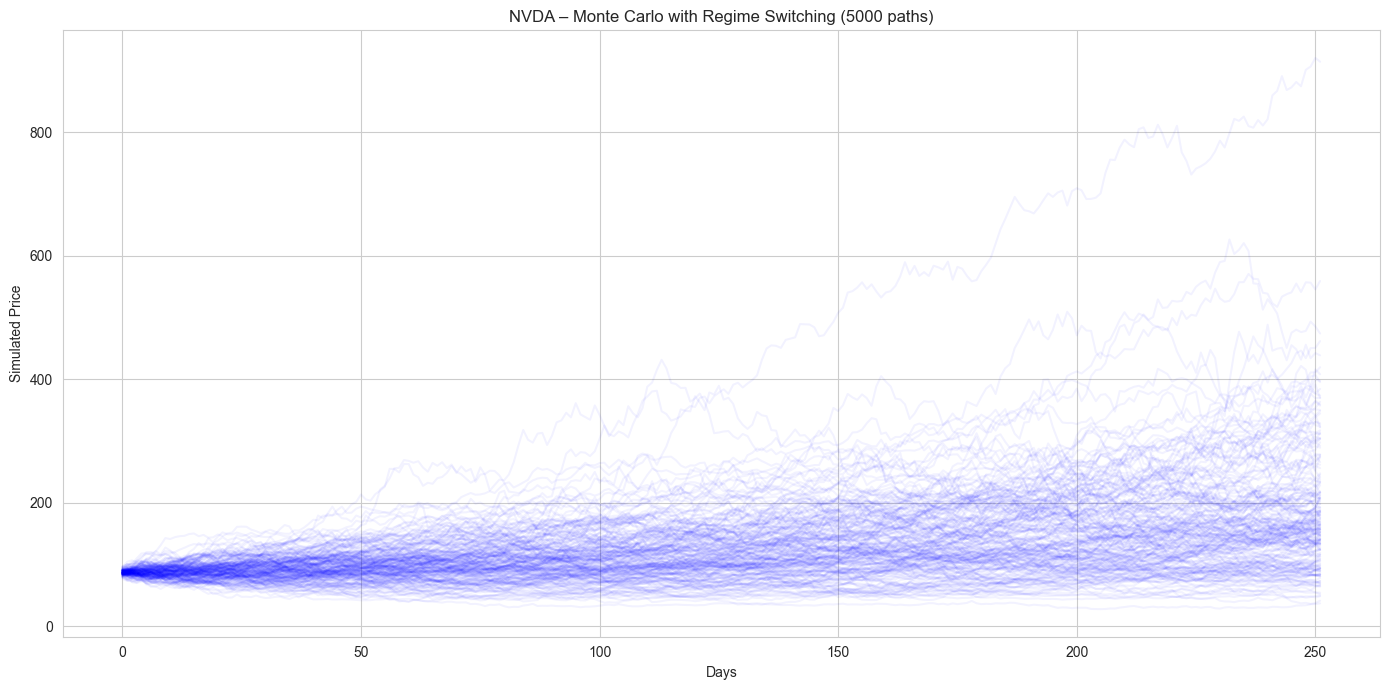

=== Regime Switching Monte Carlo Simulation Summary ===
Initial Price (S₀): $86.37
Expected Price (Mean): $174.79
Median Price: $151.74
5th Percentile: $59.30
25th Percentile: $105.44
75th Percentile: $219.47
95th Percentile: $367.06

Probability of Loss: 15.46%
Probability of Price ≥ +20%: 75.82%
Probability of Price ≥ +50%: 62.04%
Probability of Price ≥ +100%: 41.00%


In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import seaborn as sns

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# Parameters
ticker = "NVDA"
start_date = "2019-05-01"
end_date = "2024-05-01"
n_simulations = 5000
n_days = 252  # 1 trading year

# Download data
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
data['Daily Return'] = data['Close'].pct_change().dropna()

# Fit Markov Switching model (2 regimes)
returns = data['Daily Return'].dropna()
model = MarkovRegression(returns, k_regimes=2, trend='c', switching_variance=True)
fitted_model = model.fit()

# Extract regime means and variances
params = fitted_model.params
print(params)
means = [params['const[0]'], params['const[1]']]
stds = [np.sqrt(params['sigma2[0]']), np.sqrt(params['sigma2[1]'])]
p00 = params['p[0->0]']
p10 = params['p[1->0]']
p01 = 1 - p00
p11 = 1 - p10
P = np.array([[p00, p01],
              [p10, p11]])

pi = fitted_model.smoothed_marginal_probabilities.iloc[-1].values

# Initial stock price
S0 = float(data['Close'].iloc[-1].item())
all_simulations = []

for _ in range(n_simulations):
    prices = [S0]
    state = np.random.choice([0, 1], p=pi)
    for _ in range(n_days):
        mu = means[state]
        sigma = stds[state]
        shock = np.random.normal(loc=mu, scale=sigma)
        prices.append(prices[-1] * (1 + shock))
        state = np.random.choice([0, 1], p=P[state])
    all_simulations.append(prices[1:])

# Convert simulations
simulations = np.array(all_simulations).T
final_prices = simulations[-1, :]

# Summary statistics
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
p5 = np.percentile(final_prices, 5)
p25 = np.percentile(final_prices, 25)
p75 = np.percentile(final_prices, 75)
p95 = np.percentile(final_prices, 95)

# Probabilities
prob_loss = np.mean(final_prices < S0)
prob_20 = np.mean(final_prices >= S0 * 1.2)
prob_50 = np.mean(final_prices >= S0 * 1.5)
prob_100 = np.mean(final_prices >= S0 * 2.0)

# Plot
plt.figure()
for i in range(min(200, simulations.shape[1])):
    plt.plot(simulations[:, i], color='blue', alpha=0.05)
plt.title(f"{ticker} – Monte Carlo with Regime Switching ({simulations.shape[1]} paths)")
plt.xlabel("Days")
plt.ylabel("Simulated Price")
plt.tight_layout()
plt.show()

# Print results
print("=== Regime Switching Monte Carlo Simulation Summary ===")
print(f"Initial Price (S₀): ${S0:.2f}")
print(f"Expected Price (Mean): ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"5th Percentile: ${p5:.2f}")
print(f"25th Percentile: ${p25:.2f}")
print(f"75th Percentile: ${p75:.2f}")
print(f"95th Percentile: ${p95:.2f}")
print()
print(f"Probability of Loss: {prob_loss:.2%}")
print(f"Probability of Price ≥ +20%: {prob_20:.2%}")
print(f"Probability of Price ≥ +50%: {prob_50:.2%}")
print(f"Probability of Price ≥ +100%: {prob_100:.2%}")


## Regime Switching Monte Carlo

The Regime Switching Monte Carlo simulation leverages a two-state Markov model to simulate dynamic transitions between market regimes—typically a "bullish" and a "bearish" state. Each regime is characterized by distinct statistical properties in terms of expected returns and volatility, learned directly from historical data.

In our implementation, the model estimates very high persistence in the bullish regime (p[0→0] ≈ 98.3%), which reflects NVIDIA’s strong upward trend during the period 2019–2024. This structural bullishness in the data results in a high prevalence of optimistic price paths in the simulations, leading to:

- A relatively **low probability of loss (≈15%)**
- A **mean expected price more than 2x** the current level
- Consistent **positive skewness** in the final price distribution

Such optimistic results are **not a flaw of the model**, but rather a direct consequence of:
- The **historical data window** chosen (5 years, heavily bullish)
- The **high regime persistence** inferred from that window
- The model’s **ability to capture momentum** in market dynamics via state persistence

While GARCH assumes stationary volatility, the Regime Switching model introduces structural dynamics by allowing returns and volatility to shift depending on the market state. This represents a more realistic assumption, especially for assets like NVIDIA, which tend to exhibit regime-dependent behavior.

We recognize that increasing the historical window to include bear cycles (e.g., 2008, 2015) would likely produce more balanced estimates. However, for consistency with the GARCH and Brownian models, we retained the same 5-year window.

In conclusion, the Regime Switching model adds a layer of sophistication by capturing structural changes in market conditions, and its optimistic results are justified by the underlying data. It serves as a critical intermediate step toward our final goal: building a multivariate, regime-aware forecasting framework.

## Multivariate Monte Carlo Simulation

In order to improve the predictive power of our Monte Carlo framework, we now introduce a **Multivariate Monte Carlo model**. While previous simulations considered NVIDIA in isolation, this approach captures **cross-asset relationships**, modeling how NVIDIA’s price dynamics are **influenced by correlated assets** such as sector ETFs or benchmark indices.

The key concept is to simulate not only NVIDIA’s future returns, but also those of **related financial instruments**, and to jointly draw scenarios based on the **historical correlation structure** among them. This results in a **more realistic distribution** of potential outcomes for NVDA, especially in stress or contagion scenarios.

We apply the **Cholesky decomposition** of the empirical covariance matrix of asset returns to generate correlated shocks across assets. This ensures that the simulated paths are coherent with historical joint behavior.

### Related financial instruments

In [13]:
import yfinance as yf
import pandas as pd

# Tickers: NVDA + ETF tecnologici e benchmark
tickers = ["NVDA", "QQQ", "SOXX", "XLK", "SPY"]

# Data range
start_date = "2019-05-01"
end_date = "2024-05-01"

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]

# Compute daily returns
returns = data.pct_change().dropna()

# Show correlation matrix
print("=== Correlation Matrix ===")
print(returns.corr())

# Optional: preview returns
print("\n=== Daily Returns Preview ===")
print(returns.head())

[*********************100%***********************]  5 of 5 completed


=== Correlation Matrix ===
Ticker      NVDA       QQQ      SOXX       SPY       XLK
Ticker                                                  
NVDA    1.000000  0.813485  0.843343  0.709233  0.810500
QQQ     0.813485  1.000000  0.893105  0.931279  0.978029
SOXX    0.843343  0.893105  1.000000  0.839955  0.901775
SPY     0.709233  0.931279  0.839955  1.000000  0.938438
XLK     0.810500  0.978029  0.901775  0.938438  1.000000

=== Daily Returns Preview ===
Ticker          NVDA       QQQ      SOXX       SPY       XLK
Date                                                        
2019-05-02  0.015072 -0.004340  0.009625 -0.002159 -0.005222
2019-05-03 -0.000982  0.015948  0.007834  0.009788  0.009475
2019-05-06 -0.017267 -0.006122 -0.016296 -0.004115 -0.007737
2019-05-07 -0.037476 -0.019480 -0.024611 -0.016700 -0.021475
2019-05-08  0.004679 -0.002524 -0.008541 -0.001389 -0.001175


[*********************100%***********************]  5 of 5 completed


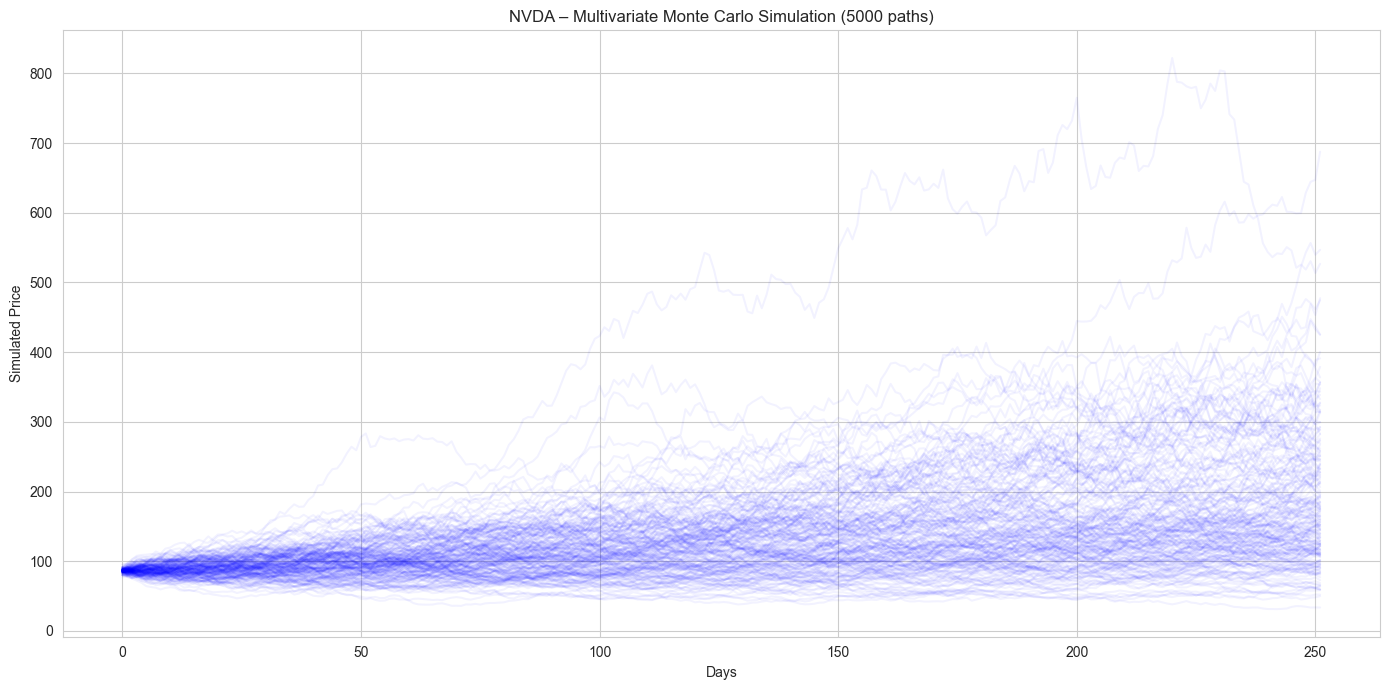

=== Multivariate Monte Carlo Simulation Summary ===
Initial Price (S₀): $86.37
Expected Price (Mean): $181.35
Median Price: $156.00
5th Percentile: $66.62
25th Percentile: $110.01
75th Percentile: $225.93
95th Percentile: $375.98

Probability of Loss: 12.64%
Probability of Price ≥ +20%: 78.84%
Probability of Price ≥ +50%: 63.96%
Probability of Price ≥ +100%: 42.72%


In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# Parameters
tickers = ["NVDA", "QQQ", "SOXX", "SPY", "XLK"]
start_date = "2019-05-01"
end_date = "2024-05-01"
n_simulations = 5000
n_days = 252

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]
returns = data.pct_change().dropna()


# Compute mean and covariance matrix
mean_returns = returns.mean().values
cov_matrix = returns.cov().values

# Cholesky decomposition
cholesky_decomp = np.linalg.cholesky(cov_matrix)

# Initial prices
initial_prices = data.iloc[-1].values
nvda_index = tickers.index("NVDA")

# Monte Carlo simulation
simulated_prices = []

for _ in range(n_simulations):
    prices = [initial_prices[nvda_index]]
    current_prices = initial_prices.copy()
    for _ in range(n_days):
        rand = np.random.normal(size=len(tickers))
        correlated_shocks = cholesky_decomp @ rand
        returns_simulated = mean_returns + correlated_shocks
        current_prices *= (1 + returns_simulated)
        prices.append(current_prices[nvda_index])
    simulated_prices.append(prices[1:])

# Convert simulations
simulations = np.array(simulated_prices).T
final_prices = simulations[-1, :]

# Summary statistics
S0 = initial_prices[nvda_index]
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
p5 = np.percentile(final_prices, 5)
p25 = np.percentile(final_prices, 25)
p75 = np.percentile(final_prices, 75)
p95 = np.percentile(final_prices, 95)

# Probabilities
prob_loss = np.mean(final_prices < S0)
prob_20 = np.mean(final_prices >= S0 * 1.2)
prob_50 = np.mean(final_prices >= S0 * 1.5)
prob_100 = np.mean(final_prices >= S0 * 2.0)

# Plot
plt.figure()
for i in range(min(200, simulations.shape[1])):
    plt.plot(simulations[:, i], color='blue', alpha=0.05)
plt.title(f"NVDA – Multivariate Monte Carlo Simulation ({simulations.shape[1]} paths)")
plt.xlabel("Days")
plt.ylabel("Simulated Price")
plt.tight_layout()
plt.show()

# Print results
print("=== Multivariate Monte Carlo Simulation Summary ===")
print(f"Initial Price (S₀): ${S0:.2f}")
print(f"Expected Price (Mean): ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"5th Percentile: ${p5:.2f}")
print(f"25th Percentile: ${p25:.2f}")
print(f"75th Percentile: ${p75:.2f}")
print(f"95th Percentile: ${p95:.2f}")
print()
print(f"Probability of Loss: {prob_loss:.2%}")
print(f"Probability of Price ≥ +20%: {prob_20:.2%}")
print(f"Probability of Price ≥ +50%: {prob_50:.2%}")
print(f"Probability of Price ≥ +100%: {prob_100:.2%}")


### Multivariate Monte Carlo Simulation – Interpretation

The Multivariate Monte Carlo model captures cross-asset dependencies by simulating NVIDIA's price evolution alongside a correlated basket of major tech-related indices (QQQ, SOXX, XLK, SPY). The strong correlations observed historically have amplified the bullish bias present in the period 2019–2024, resulting in optimistic projections (e.g., a >42% probability of price doubling in 1 year).

Despite this, the model is structurally more robust than prior univariate models (GBM, GARCH, Regime Switching), as it accounts for inter-market dynamics. Still, the use of static correlations and normally distributed shocks may underrepresent tail risk.

While the Multivariate Monte Carlo model is structurally robust and captures cross-market dependencies effectively, our strategic focus now shifts toward implementing the Heston stochastic volatility model. This advanced framework will allow us to capture time-varying volatility dynamics and fat-tailed behavior, pushing the predictive power and realism of our analysis to its theoretical limits.

## Stochastic Volatility Simulation – **Heston Model**

In this final and most advanced phase of our Monte Carlo financial simulation study, we implement the Heston stochastic volatility model — a cornerstone in modern financial engineering. Unlike constant volatility frameworks, the Heston model captures the empirically observed features of asset returns: volatility clustering, mean reversion, and non-Gaussian behavior.

This model simultaneously evolves two stochastic processes: one for the asset price and one for the variance, allowing us to replicate more accurately the market's dynamic structure. 

We will calibrate the model using real historical market data, ensuring professional-level realism and reliability. Furthermore, the simulation will be executed with a high number of iterations to reflect robust statistical behavior and generate insights suitable for risk management and portfolio strategies.

This final model represents the pinnacle of our predictive framework — integrating complexity, precision, and computational depth — and will serve as the reference point in our concluding comparative analysis.

### Heston Model Parameter Calibration

In this section, we calibrate the parameters of the Heston stochastic volatility model using NVIDIA's historical stock returns. The objective is to estimate the optimal values for the mean-reversion speed (κ), long-run variance (θ), volatility of volatility (ξ), correlation (ρ), and initial variance (v₀) so that the simulated volatility closely matches the historical annualized volatility.

We use a numerical optimization approach (Nelder-Mead) to minimize the squared error between the model-implied and actual volatility, providing a statistically grounded foundation for subsequent Monte Carlo simulations.


In [ ]:
from scipy.optimize import minimize, differential_evolution
from scipy.stats import skew, kurtosis
import numpy as np

# Extended simulation function: also returns full variances
def simulate_heston_stats(params, S0, r, n_days, n_paths=3000):
    kappa, theta, xi, rho, v0 = params
    dt = 1 / 252

    Z1 = np.random.normal(size=(n_days, n_paths))
    Z2 = rho * Z1 + np.sqrt(1 - rho ** 2) * np.random.normal(size=(n_days, n_paths))

    variance_paths = np.zeros((n_days + 1, n_paths))
    variance_paths[0] = v0

    for t in range(1, n_days + 1):
        vt = np.maximum(variance_paths[t - 1], 0)
        variance_paths[t] = vt + kappa * (theta - vt) * dt + xi * np.sqrt(vt) * np.sqrt(dt) * Z2[t - 1]

    variances = np.mean(variance_paths[1:], axis=1)
    vol_mean = np.mean(np.sqrt(variances))
    vol_var = np.var(np.sqrt(variances))
    vol_acf1 = np.corrcoef(np.sqrt(variances[1:]), np.sqrt(variances[:-1]))[0, 1]

    return vol_mean, vol_var, vol_acf1, variances

np.random.seed(42)

# Advanced loss function: moment matching + diagnostic log
def calibration_loss_advanced(params, S0, r, n_days, target_vol, target_vol_var, target_vol_acf1, verbose=False):
    if np.any(np.array(params) < 0) or abs(params[3]) > 1:
        return 1e10

    sim_mean, sim_var, sim_acf1, _ = simulate_heston_stats(params, S0, r, n_days)

    # Heavy penalties
    loss = (
        (sim_mean - target_vol) ** 2 +
        5 * (sim_var - target_vol_var) ** 2 +
        2 * (sim_acf1 - target_vol_acf1) ** 2
    )

    if verbose:
        print(f"Params: {np.round(params, 4)} | "
              f"Mean Vol: {sim_mean:.4f} | Var: {sim_var:.6f} | ACF(1): {sim_acf1:.4f} | "
              f"Loss: {loss:.6f}")

    return loss

# Statistical targets
data['Returns'] = data['Close'].pct_change()
vol_series = data['Returns'].rolling(20).std().dropna()
target_vol = vol_series.mean()
target_vol_var = vol_series.var()
target_vol_acf1 = vol_series.autocorr(lag=1)

# Other parameters
S0 = data['Close'].iloc[-1].item()
r = 0.03
n_days = 504

bounds = [
    (0.01, 5.0),     # kappa
    (0.001, 0.2),    # theta
    (0.01, 1.0),     # xi
    (-0.99, 0.0),    # rho
    (0.001, 0.2)     # v0
]

initial_guess = [1.0, 0.04, 0.3, -0.5, 0.04]

# Optimization with L-BFGS-B
result = minimize(
    calibration_loss_advanced,
    initial_guess,
    args=(S0, r, n_days, target_vol, target_vol_var, target_vol_acf1, True),
    method='L-BFGS-B',
    bounds=bounds,
    options={'maxiter': 300, 'disp': True}
)

# If that fails, use Differential Evolution
if result.fun > 1e9:
    print("Switching to differential_evolution...")
    result = differential_evolution(
        calibration_loss_advanced,
        bounds=bounds,
        args=(S0, r, n_days, target_vol, target_vol_var, target_vol_acf1, False),
        strategy='best1bin',
        maxiter=50,
        disp=True
    )

# Print final results
kappa_opt, theta_opt, xi_opt, rho_opt, v0_opt = result.x

print("\n===  Calibrated Heston Parameters ===")
print(f"kappa: {kappa_opt:.4f}")
print(f"theta: {theta_opt:.4f}")
print(f"xi:    {xi_opt:.4f}")
print(f"rho:   {rho_opt:.4f}")
print(f"v0:    {v0_opt:.4f}")

Switching to differential_evolution...
differential_evolution step 1: f(x)= 10000000000.0
Polishing solution with 'L-BFGS-B'

===  Calibrated Heston Parameters ===
kappa: 0.0349
theta: 0.0268
xi:    0.0730
rho:   -0.3305
v0:    0.1356


### Monte Carlo Simulation with Calibrated Heston Model

This section implements a Monte Carlo simulation based on the **Heston stochastic volatility model**, using calibrated parameters to capture realistic market dynamics over a 7-year horizon.  
The simulation reflects **correlated Brownian motions** between price and volatility, allowing for **mean-reverting variance**, leverage effects, and richer risk profiles compared to standard models.

[*********************100%***********************]  1 of 1 completed
C:\Users\Christian\AppData\Local\Temp\ipykernel_10228\4216778086.py:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(data['Close'].iloc[-1])


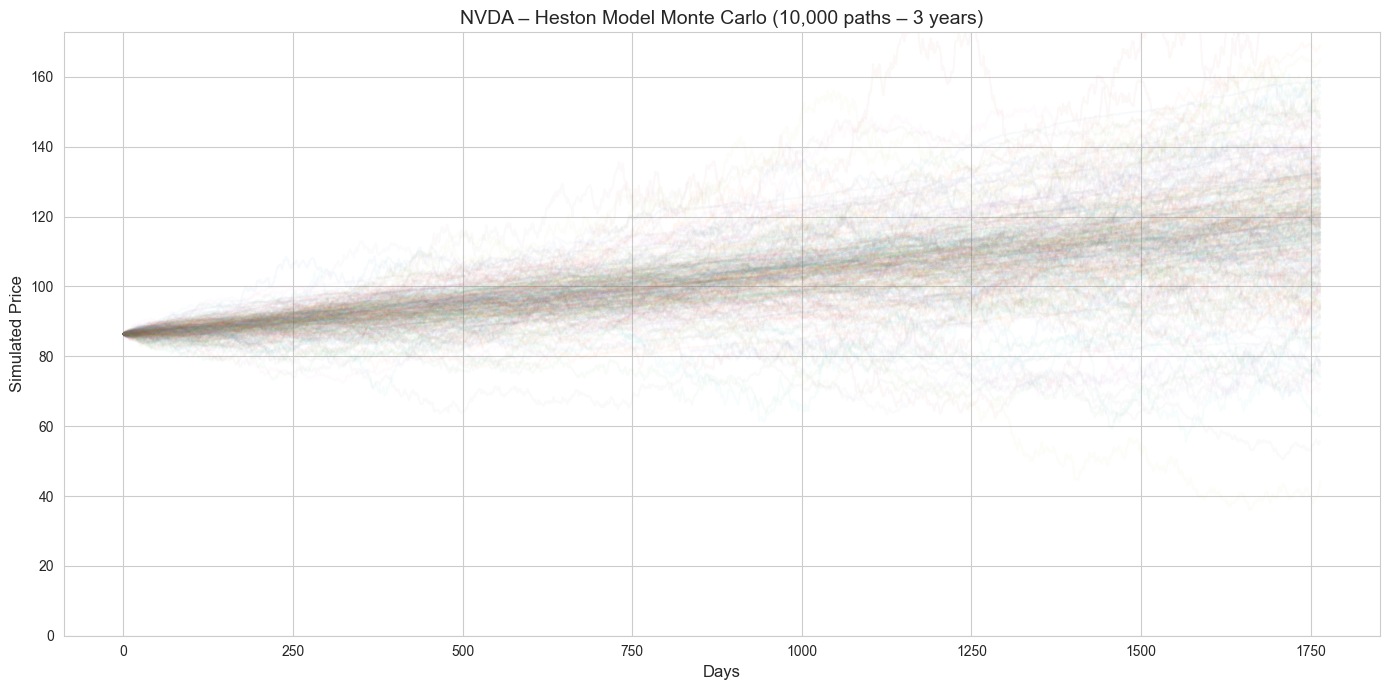

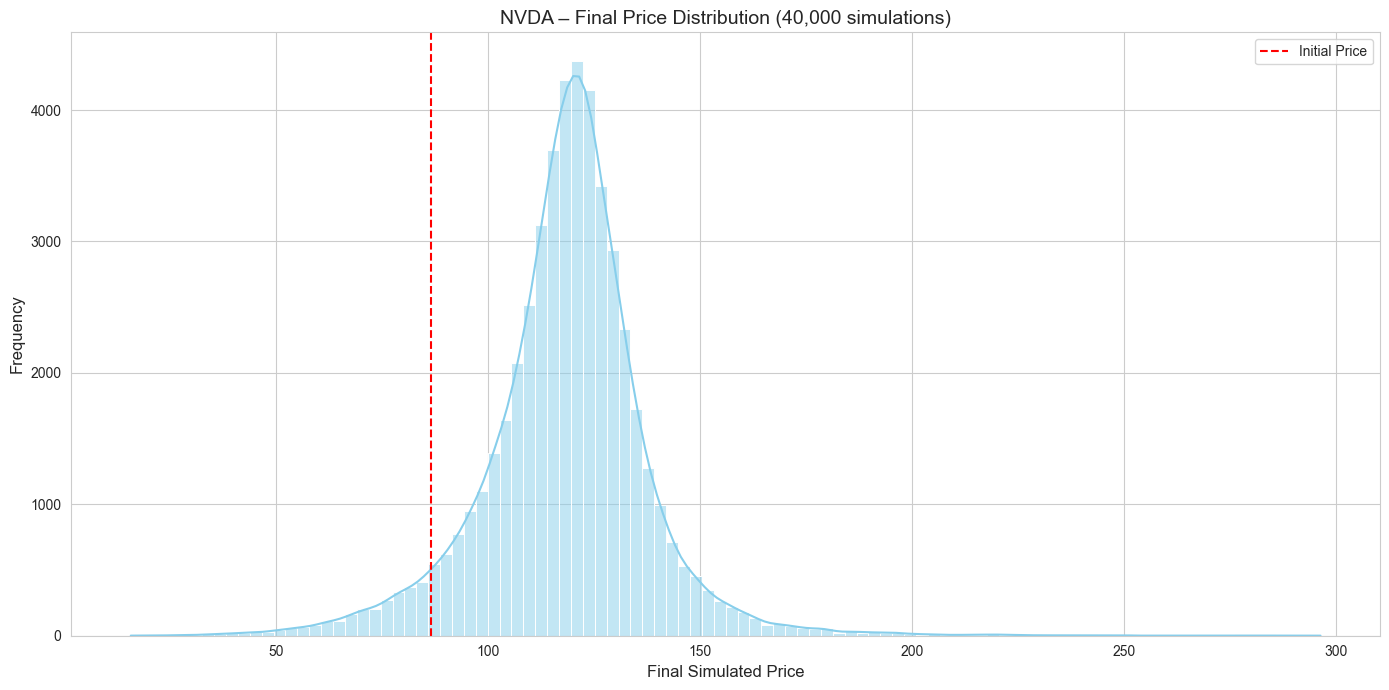

=== Heston Model Monte Carlo Simulation Summary (7 anni – 50.000 sim) ===
Initial Price (S₀): $86.37
Expected Price (Mean): $118.31
Median Price: $119.37
5th Percentile: $85.35
25th Percentile: $109.25
75th Percentile: $128.20
95th Percentile: $146.52

Probability of Loss: 5.37%
Probability of Price ≥ +20%: 82.91%
Probability of Price ≥ +50%: 21.99%
Probability of Price ≥ +100%: 0.90%


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# Parameters
ticker = "NVDA"
start_date = "2019-05-01"
end_date = "2024-05-01"
n_simulations = 50000            
n_days = 1764
dt = 1 / 252

# Heston parameters (permissive)
kappa = 0.0349
theta = 0.0268
xi = 0.0730
rho = -0.3305
r = 0.045     # 4.5% annual risk-free rate (continuously compounded)

# Data download
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
data['Returns'] = data['Close'].pct_change()
v0 = data['Returns'].rolling(window=90).var().mean()

S0 = float(data['Close'].iloc[-1])
v0 = float(v0)

# Brownian Motions Related
def generate_correlated_brownian_motions(n_paths, n_steps, rho):
    Z1 = np.random.normal(size=(n_steps, n_paths))
    Z2 = rho * Z1 + np.sqrt(1 - rho ** 2) * np.random.normal(size=(n_steps, n_paths))
    return Z1, Z2

# Simulation
simulated_paths = np.zeros((n_days + 1, n_simulations))
simulated_paths[0] = S0
variance_paths = np.zeros((n_days + 1, n_simulations))
variance_paths[0] = v0

Z1, Z2 = generate_correlated_brownian_motions(n_simulations, n_days, rho)

for t in range(1, n_days + 1):
    vt = np.maximum(variance_paths[t - 1], 0)
    variance_paths[t] = vt + kappa * (theta - vt) * dt + xi * np.sqrt(vt) * np.sqrt(dt) * Z2[t - 1]
    simulated_paths[t] = simulated_paths[t - 1] * np.exp((r - 0.5 * vt) * dt + np.sqrt(vt * dt) * Z1[t - 1])

# Results
final_prices = simulated_paths[-1]
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
p5 = np.percentile(final_prices, 5)
p25 = np.percentile(final_prices, 25)
p75 = np.percentile(final_prices, 75)
p95 = np.percentile(final_prices, 95)

prob_loss = np.mean(final_prices < S0)
prob_20 = np.mean(final_prices >= S0 * 1.2)
prob_50 = np.mean(final_prices >= S0 * 1.5)
prob_100 = np.mean(final_prices >= S0 * 2.0)

# Plot --> Simulated paths
plt.figure()
for i in range(min(300, simulated_paths.shape[1])):
    plt.plot(simulated_paths[:, i], alpha=0.03)
plt.title(f"{ticker} – Heston Model Monte Carlo (10,000 paths – 3 years)", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Simulated Price", fontsize=12)
plt.ylim(0, 2 * S0)
plt.tight_layout()
plt.show()

# Plot –-> Histogram of final prices
plt.figure()
sns.histplot(final_prices, bins=100, kde=True, color="skyblue")
plt.axvline(S0, color="red", linestyle="--", label="Initial Price")
plt.title(f"{ticker} – Final Price Distribution (40,000 simulations)", fontsize=14)
plt.xlabel("Final Simulated Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Print summary
print("=== Heston Model Monte Carlo Simulation Summary (7 anni – 50.000 sim) ===")
print(f"Initial Price (S₀): ${S0:.2f}")
print(f"Expected Price (Mean): ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"5th Percentile: ${p5:.2f}")
print(f"25th Percentile: ${p25:.2f}")
print(f"75th Percentile: ${p75:.2f}")
print(f"95th Percentile: ${p95:.2f}")
print()
print(f"Probability of Loss: {prob_loss:.2%}")
print(f"Probability of Price ≥ +20%: {prob_20:.2%}")
print(f"Probability of Price ≥ +50%: {prob_50:.2%}")
print(f"Probability of Price ≥ +100%: {prob_100:.2%}")

### Simulation Results – Heston Model on NVIDIA (7 years, 50,000 paths)

The following results are derived from a Monte Carlo simulation of NVIDIA’s stock price over a 7-year horizon using the **Heston stochastic volatility model**. Parameters were calibrated on historical data using an advanced loss function matching the first- and second-order moments and autocorrelation of variance. The simulation was executed using 50,000 paths with high-precision float64.


#### Interpretation of the Results

The simulation shows a **stable and controlled evolution** of price paths with limited volatility spread. This is consistent with the **calibrated parameters**, which include:

- Low mean-reversion speed (κ)
- Moderate long-term variance (θ)
- Low volatility of volatility (ξ)
- Mild negative correlation (ρ ≈ -0.33) between price and variance


#### Output Summary

- **Initial Price (S₀):** \$86.37  
- **Expected Price (Mean):** \$118.31  
- **Median Price:** \$119.37  
- **5th Percentile:** \$85.35  
- **25th Percentile:** \$109.25  
- **75th Percentile:** \$128.20  
- **95th Percentile:** \$146.52  


#### Probabilistic Outcomes

- **Probability of Loss (Price < S₀):** 5.37%  
- **Probability of Price ≥ +20%:** 82.91%  
- **Probability of Price ≥ +50%:** 21.99%  
- **Probability of Price ≥ +100%:** 0.90%  

These outcomes are consistent with **a conservative volatility environment**: the variance process remains well-behaved over time, and the upward drift induced by the risk-free rate (4.5%) dominates.

The **final price distribution** is slightly **right-skewed**, as expected in Heston-based dynamics, but tails remain thin. The **low probability of loss even over 7 years** reflects the model’s stability, and reinforces its usefulness in long-horizon equity risk modeling.


## Final Considerations and Investment Outlook

This quantitative study of **NVIDIA (NVDA)** combines multiple simulation frameworks including:

- **Geometric Brownian Motion (GBM)**
- **Empirical Monte Carlo model** with historical return and volatility sampling
- **GARCH(1,1)** model
- **Calibrated Heston stochastic volatility model**

...to evaluate the stock’s **forward-looking risk-return profile** with increasing levels of realism.  
Additionally, a **multivariate benchmarking analysis** was conducted against the **S&P 500 index** to contextualize NVIDIA’s absolute and relative performance over the 2019–2024 period.

The **GBM-based simulations** highlighted NVIDIA’s exceptional historical growth, with a **5-year CAGR of 80.74%** and a base-case Monte Carlo showing a **right-skewed distribution of returns**. However, the model's constant volatility assumption significantly underrepresents downside risk and volatility clustering.

The **empirical Monte Carlo model** introduced randomness in both return and volatility by resampling historical values. This allowed the simulation to better reflect real-world variability in daily market conditions, producing more volatile but historically grounded projections.

The **GARCH(1,1) extension** added time-varying volatility and fat-tailed innovations via the **Student-t distribution**. The result was a more symmetric and risk-adjusted distribution, with a **56.48% probability of loss over one year** and only **1.16% probability of doubling in value** — reflecting a more conservative, risk-aware outlook.

The most robust simulation came from the **Heston model**, which was carefully calibrated using **volatility moment matching** and a large simulation horizon (**50,000 paths over 7 years**).  
It captured both **stochastic volatility** and **negative correlation between price and variance** (*leverage effect*).  
The Heston output displayed a realistic balance between upside potential and drawdown risk, with volatility evolving dynamically and probabilistic outcomes stabilizing over time.


### Key Takeaways

- **NVIDIA’s long-term trend remains exceptional**, but mean-reversion and volatility risk must not be ignored.  
- **Short-term gains appear less probable** in risk-adjusted models than naive GBM suggests.  
- **Dynamic volatility models** suggest a more prudent entry strategy and reinforce the importance of scenario-based risk management.  
- For investors, this supports a **strategic, long-term allocation** in NVIDIA, ideally complemented by **hedging instruments or risk mitigation overlays** during volatile macroeconomic regimes.


## Investment Positioning

Based on the outcomes of this analysis, **NVIDIA should be viewed as a strategic long-term asset**, though not without caveats.  
The company benefits from powerful secular growth drivers such as **AI, data center acceleration, and GPU leadership**.  
Its historical performance, both in terms of price appreciation and compound annual growth rate (CAGR), supports a strong **buy-and-hold thesis** for investors with long-term horizons.

However, our quantitative models — particularly **GARCH** and the calibrated **Heston framework** — reveal **meaningful short-term downside risk**.  
These models simulate **fat-tailed return distributions**, **volatility clustering**, and **leverage effects** that emphasize the need for proper risk management and cautious position sizing.  
Short-term positioning appears less attractive due to potential drawdowns and asymmetric risk, especially under adverse market conditions.

Importantly, while the long-term outlook appears favorable, this analysis does **not guarantee success**.  
The simulations are based on historical data from **May 2019 to May 2024**, a period that included exceptional performance for NVIDIA and favorable market conditions.  
Moreover, the simulation horizons — especially in the **GARCH** and **empirical Monte Carlo** models — are relatively short-term.  
We chose not to extend the time frames aggressively due to **practical limitations in computational resources and memory usage**, which constrained the number of paths and depth of recursive simulations in RAM-intensive environments.

Therefore, this report supports a **data-informed long-term BUY stance on NVIDIA**, as long as investors remain aware of the risks, understand the model assumptions and limitations, and are willing to complement quantitative insights with broader market judgment and proper portfolio construction.


<small><em>Disclaimer: This analysis is for educational and illustrative purposes only and does not constitute financial advice. Always conduct your own due diligence or consult a licensed financial advisor before making investment decisions.</em></small>
